<h1>Točkovni vzorci</h1>

<p>Točke so prostorski vnosi, ki so lahko razumljene na dva različna načina. Po eni strani lahko točke vidimo kot fiksne objekte v prostoru, kar pomeni da je njihova lokacija eksogena. V tej razlagi se lokacija opazovane točke obravnava kot sekundarna, glede na opazovano vrednost v točki. Po drugi strani pa lahko opažanje, ki se pojavlja na točki, razumemo tudi kot mesto merjenja iz osnovnega, geografsko neprekinjenega procesa. V tem primeru se meritev lahko zgodi kjerkoli, a se je dejansko izvedla le na nekaterih lokacijah.<br>
<p>Ko točke razumemo kot dogodke, ki se lahko pojavijo na več lokacijah, a se zares zgodijo le na delu teh, kolekcijo takih pojavov imenujemo <em>točkovni vzorec</em>. V tem primeri so lokacije točk ena glavnih interesov analize. Dober primer točkovnih vzorcev so drevesa v sestoju. Teoretično bi se lahko, v novo obnovljenem sestoju, mlada drevesa pojavljala skoraj kjerkoli, a se največkrat koncentrirana ob vznožju starejših dreves. Točkovni vzorci so lahko <em>označeni (v angleščini marked)</em>, če imamo podatke še o čem drugem kot samo o lokaciji, in pa <em>neoznačeni (unmarked)</em>, če imamo podatke le o lokaciji. Analiza, ki sledi je primer analize neoznačenega točkovnega vzorca, saj sem se osredotočil le na lokacijo.</p>

<h1>Uvod</h1>

<p>Analiza točkovnih objektov se torej ukvarja z vizualizacijo, opisom, statistično karakterizacijo in modeliranjem točkovnik vzorcev in pri tem poizkuša razumeti proces generiranja, ki je vzorec ustvaril, ter razložiti opazovane podatke. Pri tem so pogosta vprašanja:</p>
 <ul>
 <li><em>Kako izgleda vzorec?</em></li>
 <li><em>Kako so točke razporejeno po prostoru?</em></li>
 <li><em>Ali obstaja kakšna struktura v razporeditvi točk? Torej ali so razporejene gručasto ali razpršeno?</em></p>
 <li><em>Zakaj se točke pojavljajo na teh mestih in ne na drugih?</em></p>
 </ul>

<p>Med izrazoma <em>proces</em> in <em>vzorec</em> obstaja pomembna razlika. Proces se nanaša na osnovni mehanizem, ki je odgovoren za izid, ki ga kasneje opazujemo. Zaradi njegove abstraktnosti, ga ne moramo videti. Vseeno pa je v mnogih kontekstih glavni poudarek analize to, da ugotovimo <em>kaj</em> določi nek pojav in <em>kako</em> se te faktorji združijo, da ga ustvarijo. V tem kontekstu je proces povezan s <em>kako</em>. Vzores pa se po drugi strani nanaša na rezultat procesa. V mnogih primerih je vzorec edina sled procesa, ki jo lahko opazujemo in posledično edini vnos, ki ga imamo, da bi proces rekonstruirali. Čeprav je vzorec lažji za razumevanje in ga je možno opazovati direktno, je navsezadnje še vedno le odsev procesa. Resnični iziv je, iz vzorca določiti proces.</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pointpats import centrography, distance_statistics, QStatistic, random, PointPattern, Window, PoissonPointProcess, ripley
from matplotlib.patches import Ellipse
import libpysal
from shapely.geometry import Polygon, point
from sklearn.neighbors import KDTree

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<string>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapel

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
xlsx = pd.ExcelFile('Ploskev2_in3.xlsx')
ploskev_2_in_3_df = pd.read_excel(xlsx, sheet_name=[0,1])
podatki = ploskev_2_in_3_df[0]

In [5]:
podatki.describe()

,Ploskev,X_m,Y_m,ID,Species,DBH_09_mm,DST_09,Velikost_krosnje_09,Socialni_razred_09,Utesnjenost_krosnje_09,...,Napaka_debla_3_21,Poskodovanost_debla_21,Sirina_krosnje_gor_21,Sirina_krosnje_desno_21,Visina_21_m,Visina do krošnje_21,Status_drevesa_09.1,Status_21,Odkazilo zaradi drevesa No._21,ba
count,369.0,367.000000,367.000000,369.000000,369.000000,369.000000,369.000000,367.000000,367.000000,367.000000,...,0.0,200.000000,25.000000,25.000000,25.000000,25.000000,369.000000,369.000000,0.0,369.000000
mean,3.0,11.742730,17.145371,185.000000,41.054201,92.647696,2.411924,4.182561,2.719346,4.839237,...,NaN,0.655000,1.276000,2.000000,15.688000,8.840000,2.159892,4.780488,NaN,0.007563
std,0.0,8.774171,8.601122,106.665365,1.041158,32.171171,0.619843,0.869596,1.116313,0.375168,...,NaN,2.116215,0.618654,0.887412,5.782396,3.297474,0.579464,3.317943,NaN,0.011628
min,3.0,-4.597000,0.183000,1.000000,41.000000,50.000000,2.000000,1.000000,1.000000,3.000000,...,NaN,0.000000,0.000000,0.500000,1.200000,5.100000,1.000000,1.000000,NaN,0.000000
25%,3.0,3.967500,9.968000,93.000000,41.000000,68.000000,2.000000,4.000000,2.000000,5.000000,...,NaN,0.000000,0.900000,1.600000,15.300000,6.500000,2.000000,2.000000,NaN,0.000000
50%,3.0,11.316000,17.580000,185.000000,41.000000,85.000000,2.000000,4.000000,2.000000,5.000000,...,NaN,0.000000,1.200000,2.100000,17.700000,8.200000,2.000000,3.000000,NaN,0.003117
75%,3.0,19.684000,24.030500,277.000000,41.000000,112.000000,3.000000,5.000000,3.000000,5.000000,...,NaN,0.000000,1.700000,2.300000,19.100000,9.400000,3.000000,9.000000,NaN,0.009503
max,3.0,28.402000,34.332000,369.000000,61.000000,210.000000,5.000000,5.000000,5.000000,5.000000,...,NaN,8.000000,2.500000,3.800000,20.200000,17.900000,3.000000,9.000000,NaN,0.059828


In [5]:
points = ploskev_2_in_3_df[0][['X_m', 'Y_m']].dropna(how='all')
points

,X_m,Y_m
0,0.627,0.183
1,0.724,0.620
2,1.571,1.282
3,2.807,1.447
4,5.039,1.339
...,...,...
362,20.189,29.700
363,19.941,29.295
364,20.749,26.246
365,20.795,24.845


In [6]:
sns.set_style('darkgrid')

<h1>Vizualizacija točkovnih vzorcev</h1>

<p>Načinov vizualizacije točkovnih objektov je več. V tej analizi sem se odločil za graf raztrosa (scatterplot) in za nekaj prikazov gostote točk, preko t.i. <em>Hex-binning</em>
in <em>Kernal Density Estimation (KDE)</em>.</p>


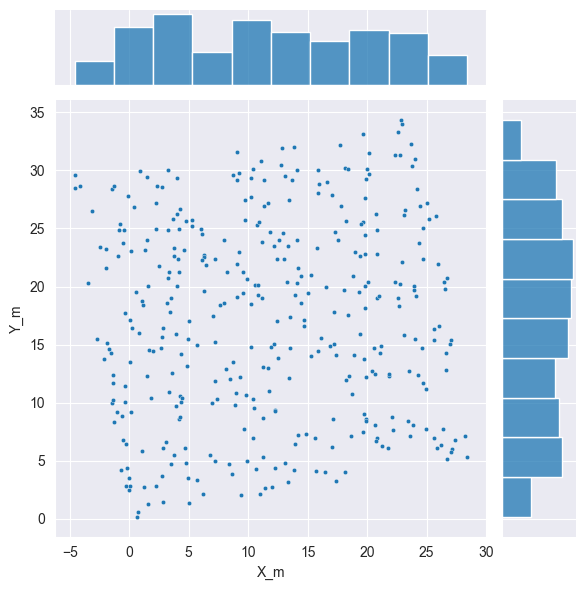

In [8]:
sns.jointplot(x=points.X_m, y=points.Y_m, s=10)

plt.show()

<p>Na podlagi grafa raztrosa izgleda razporeditev precej naključna. Tudi stolpični diagrami izgledajo precej enakomerni, razen na robovih, kar pa lahko pripišemo rahlo "premaknjeni" obliki ploskve.</p>

<h3>Prikaz gostote prek t.i. Hex-binninga</h3>

<p>Za tak prikaz gostote, ustvarimo pravilno mrežo, bodisi kvadratno ali šestkotno, preštejemo koliko točk se pojavi v določeni celici in ga predstavimo s pomočjo barve, ki ponazarja količino točk v celici.</p>

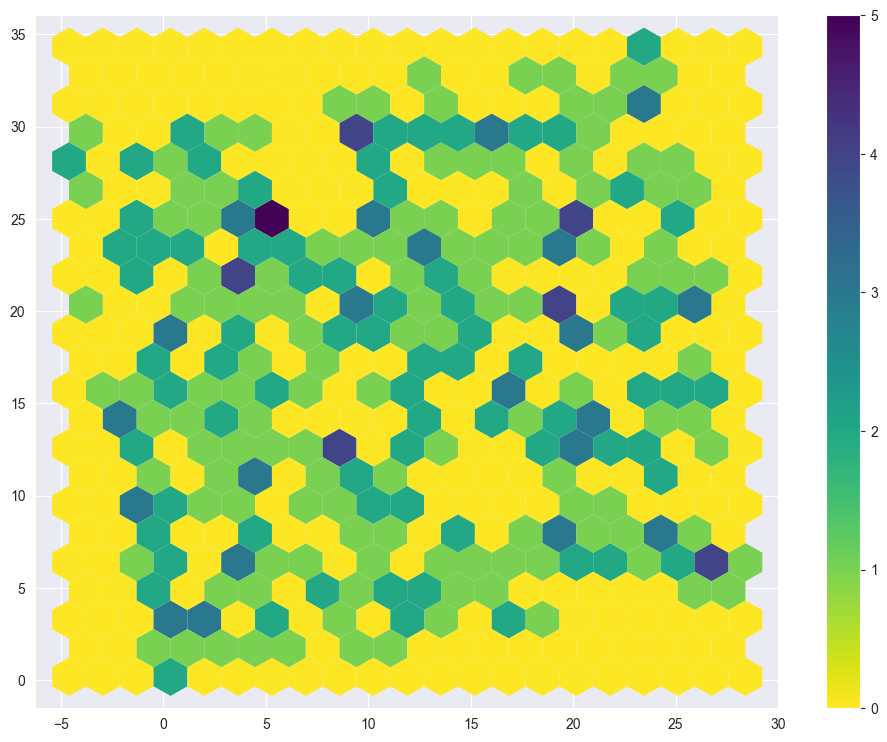

In [9]:
f, ax = plt.subplots(1, figsize=(12, 9))

hb = ax.hexbin(points.X_m, points.Y_m, gridsize=20, linewidths=0, alpha=1, cmap='viridis_r')

plt.colorbar(hb)
plt.show()

<h3>Kernal Densety Estimation (KDE)</h3>

<p> Mreže so prostorski ekvivalent histogramom. Uporabnik določi koliko celic želi in program prešteje točke znotraj le-teh. To je hitro učinkovito in je lahko precej natančno, če uporabnik določi veliko celic. Vendar pa predstavlja diskretizacijo, kar je v bistvu sosednji pojav in kot tak lahko povzroča nepravilnosti. Alternativen pristop je, da ustvarimo, kar je poznano kot '<em>kernal density estimation (KDE)</em>'; empiričnai približek funkciji gostote verjetnosti. Namesto mreže kvadratov/šestkotnikov in štetja točk znotraj vsakega, KDE "položi" mrežo točk preko raziskovalnega območja, na katero "postavi" <em>Kernal</em> funkcije, ki štejejo točke okoli njih, z določeno težo, ki je določena na podlagi radalje. Preštete toče se združijo, da ustvarijo globalno površino z verjetnostjo. Najpogostejša <em>Kernal</em> funkcija je Gaussova, ki uporablja normalno porazdelitev za utežene točke. Rezultat je zvezna površina z verjetnostno funkcijo, ki jo je mogoče ovrednotiti na vsaki točki.</p>

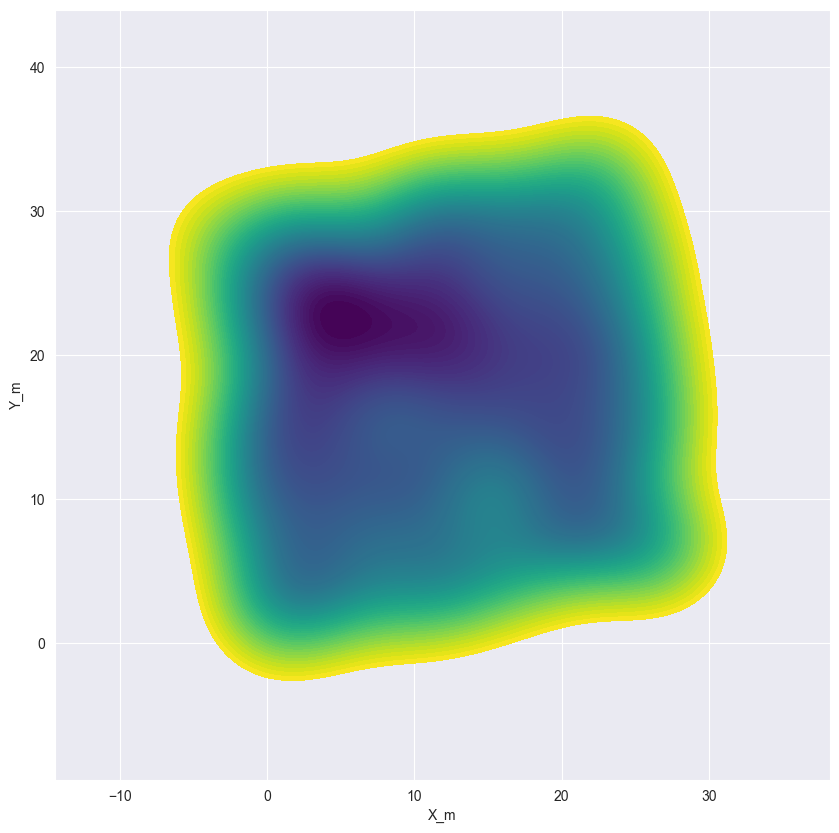

In [10]:
f, ax = plt.subplots(1, figsize=(10,10))

sns.kdeplot(x=points.X_m, y=points.Y_m, n_levels=100, fill=True, alpha=1, cmap='viridis_r')

plt.show()

<p>Na podlagi grafa KDE bi se dalo določiti eno točko zgostitve okoli (15, 25).</p>

<h3>Centrografija</h3>

<p>Centrografija je analiza centralnosti v točkovnih vzorcih. Izraz <em>centralnost</em> pomeni generalna pozicija in disperzija v vzorcu točk. Centrografijo bi lahko razumeli tudi kot točkovno vzorčni ekvivalent meram centralne tendence, kot je povprečje. Te meritve so uporabne saj nam pomagajo razumeti prostorsko razporeditev manjših sklopov informacij.</p>

<h4>Tendenca</h4>

<p>Pogosta meritev za centralno tendenco točkovnega vzorca je njegovo središče mase. Za označene ("marked") točkovne vzorce, je center mase neka centralna točka, blizu točk, ki imajo višje vrednosti v svojih označenih atributih. Za neoznačene ("unmarked") točkovne vzorce, je center mase ekvivalenten povprečni sredini ali povprečji koordinatnih vrednosti. Podobno je tudi <em>medianino središče(*?*)</em> analogno mediani drugod in predstavlja točko, kjer je polovica vrednosti nad ali pod in polovica levo ali desno.</p>

In [11]:
mean_center = centrography.mean_center(points[['X_m', 'Y_m']])
median_center = centrography.euclidean_median(points[['X_m', 'Y_m']])
print('Središče mase: ' + str(mean_center))
print('Medianino središče: ' + str(median_center))

Središče mase: [11.74273025 17.14537057]
Medianino središče: [11.66096961 17.56078869]


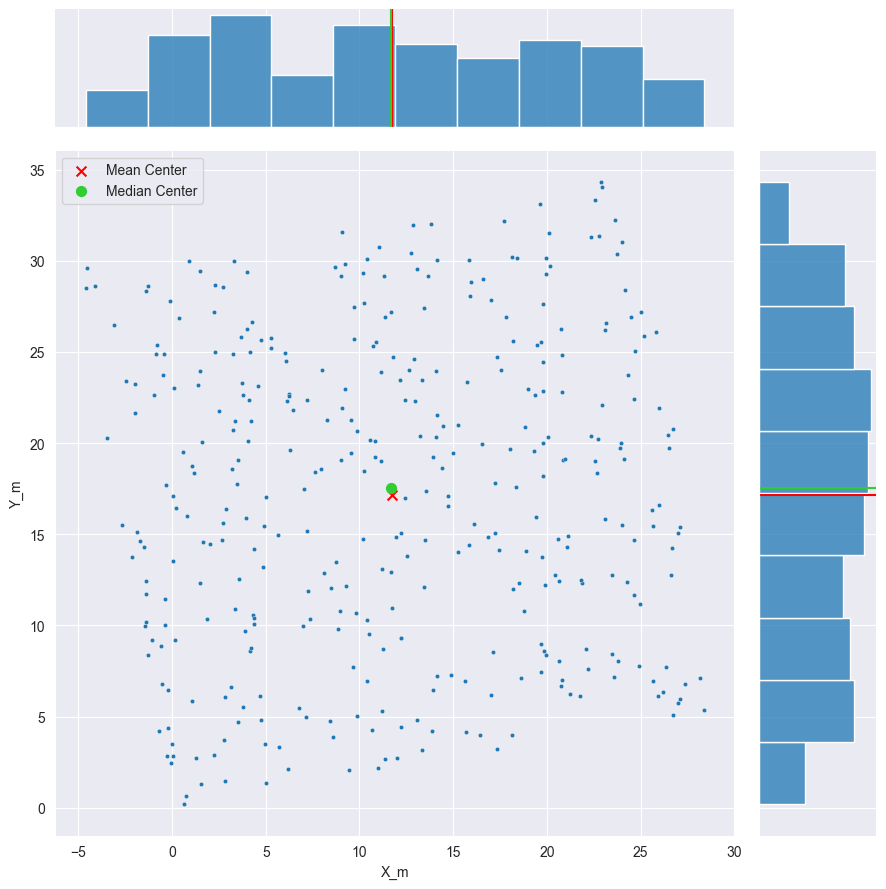

In [12]:
joint_axes = sns.jointplot(x=points.X_m, y=points.Y_m, s=10, height=9)

joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

joint_axes.ax_joint.scatter(*median_center, color='limegreen', marker='o', s=50, label='Median Center')

joint_axes.ax_marg_x.axvline(median_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(median_center[1], color='limegreen')

joint_axes.ax_joint.legend()

plt.show()

<p>Središče mase in medianino središče sta si zelo blizu, kar nakazuje na enakomerno razporeditev točk preko celotnega raziskovalnega prostora.</p>

<h3>Disperzija</h3>

<p>Pogosta mera disperzije v centrografiji je <em>standardna razdalja</em>. Ta vrednost ponazarja povprečno razdaljo med točkami in središčem oblaka točk.</p>

In [13]:
std_dist = centrography.std_distance(points[['X_m', 'Y_m']])
print('Standardna razdalja: ' + str(std_dist))

Standardna razdalja: 12.270046329865572


<p>To pomeni, da so v povprečju drevesa oddaljena 12,27 m od povprečnega središča.<br><br>
Še en priročen način vizualizacije je <em>elipsa standardne deviacije</em> ali <em>standardna elipsa</em>. To je elipsa, ki je odvisna od podatkov in predstavlja njihovo središče, disperzijo in orientacijo.</p>

In [14]:
major, minor, rotation = centrography.ellipse(points[['X_m', 'Y_m']])
print('Dolžina: ' + str(major))
print('Višina: ' + str(minor))
print('Orientacija: ' + str(rotation))

Dolžina: 11.910435302315133
Višina: 11.990333396675798
Orientacija: 0.9465149375829711


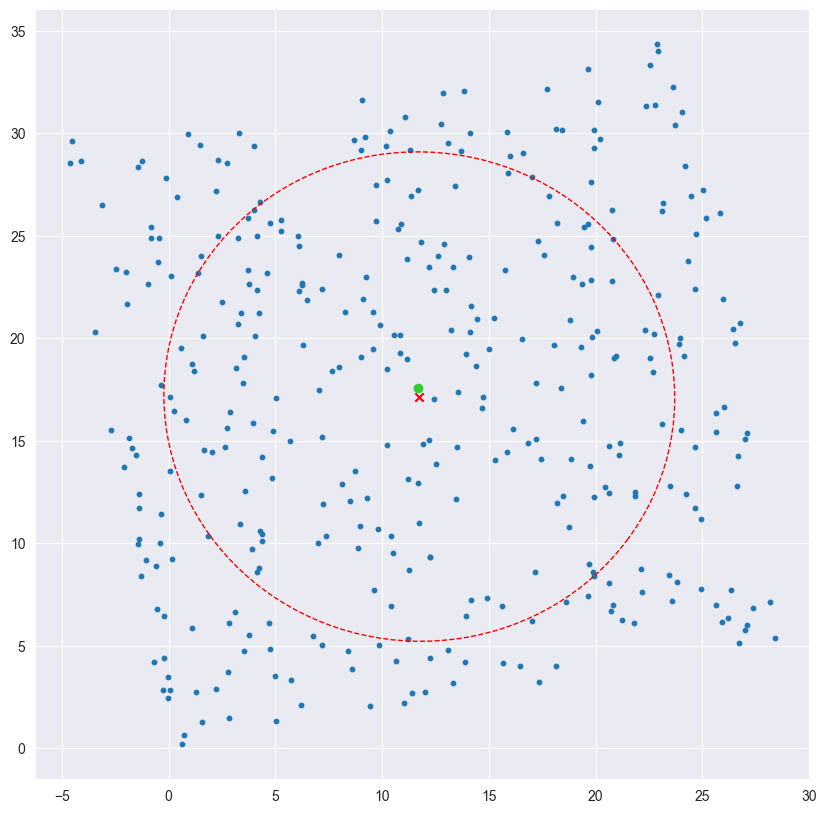

In [15]:
f, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(x=points.X_m, y=points.Y_m, s=10)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*median_center, color='limegreen', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, width=major * 2, height=minor * 2, angle=np.rad2deg(rotation), facecolor='none', edgecolor='red', linestyle='--',label='Std. Ellipse')

ax.add_patch(ellipse)

plt.show()

<p>Že iz vrednosti je očitno, da je nastala elipsa pralktično krog, kar pomeni, da so točke razporejene enakomerno.</p>

<h3><em>Quadrat statistics (statistika kvadratov?)</em></h3>
<p><em>***Ne znam prevesti***</em></p><br>
<p><em>Quadrat statistics</em> preučuje prostorsko razporeditev točk na danem območju, gede na število opazovanj (tokrat dreves), ki "padejo" v dano celico. S preučevanjem, ali so opazovanja enakomerno porazdeljena po celicah, je cilj kvadratnega pristopa oceniti, ali so točke razpršene ali združene v nekaj celicah. <em>Quadrat statistics</em> preučuje <em>enakomernost</em> porazdelitve preko celic z uporabo hi kvadrat statističnega testa, ki je pogost pri analizi kontingenčnih tabel.</p>

In [7]:
numpy_array = points.to_numpy()

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


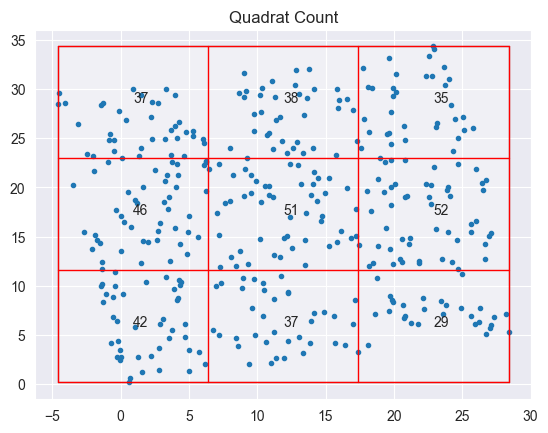

In [17]:
qstat = QStatistic(numpy_array)
qstat.plot()

In [18]:
qstat.chi2_pvalue

0.1766696047517633

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


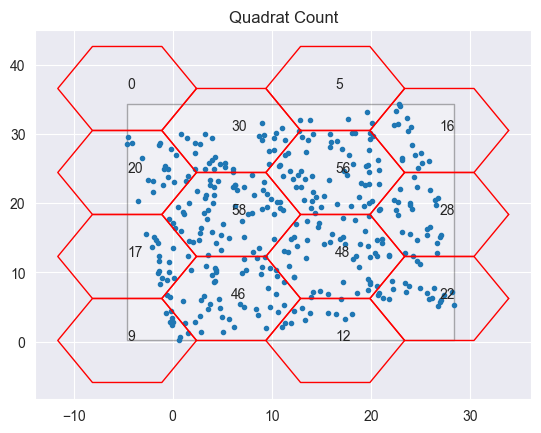

In [19]:
qstat_hex = QStatistic(numpy_array, shape='hexagon',lh=7)
qstat_hex.plot()

In [20]:
qstat_hex.chi2_pvalue

4.645465738312661e-31

<p>Zaradi nepravilnosti poligona preučevanega območja, imajo testi kvadratov(?) lahko težave. Kvadrati so v tem primeru primernejša oblika celic, katerih p-vrednost nakazuje, da je razporeditev naključna. Vseeno je potrebno rezultat jemati z razervo, zaradi nepravilnosti poligona.</p>

<h3>Riplijeva abeceda funkcij</h3>

<p>Pri točkovnih vzorcih poznamo tri tipe metod na podlagi razdalje med sosedi.</p>
<ul>
<li>Statistika povprečno najbližje razdalje med sosedi</li>
<li>Funkcije najbližje razdalje med sosedi</li>
<li>Funkcije interventne razdalje.</li></ul>
<h4>Statistika povprečno najbližje razdalje med sosedi</h4>
<p>Najbližji sosedi točkam <em>u</em> so točke <em><strong>N(u)</strong></em>, ki ustrezajo pogojem:</p>
<p>d<sub>u,N(u)</sub>≤d_<sub>u,j</sub> ∀ j ∈ S-u</p><br>
Razdalja med najbližjimi sosedi je <em><strong>N(u)</strong></em> in točko <em>u</em> je razdalja najbližjega soseda za <em>u</em>. Če izračunamo razdalje najbližjih sosedov za vse točke lahko iz teh podatkov dobimo povprečno razdaljo najbližjih sesedov.</p>

<h4>Funkcije najbližje razdalje med sosedi</h4>

<p>Funkcije najbližje razdalje med sosedi točkovnega procesa so kumulativne porazdelitvene funkcije več vrst <strong>G, F, J</strong>. S primerjavo funkcije razdalje opazovanega vzorca točk s funkcijo vzorca točk iz procesa popolne prostorske naključnosti (CSR) lahko sklepamo, ali je osnovni prostorski proces opazovanega vzorca točk CSR ali ne za dano stopnjo zaupanja.</p>
<h5>G funkcija</h5>
<p>G funkcija je nekakšna kumulativna gostota, ki opisuje porazdelitev razdalj znotraj točkovnega vzorca. Za dano razdaljo <em><strong>d,G(d)</strong></em> je delež razdalj najbližjih sosedov, ki so manjše od <em><strong>d</strong></em>. Da bi to izrazili, moramo najprej definirati razdaljo najbližjega soseda, ki je najmanjša razdalja od vsakega opazovanja <em><strong>i</strong></em> do nekega drugega opazovanja <em><strong>j</strong></em>, kjer <em><strong>j</strong></em> ni enak <em><strong>i</strong></em>.<br>
S tem lahko definiramo G funkcijo kot kumulativno funkcijo gostote:</p>
<p>**Enačba je v word datoteki**<sup>[2]</sup></p>
<p>kjer je <em><strong>μ(.)</em></strong> indikatorska funkcija ki ima vrednost 1, ko argument drži in vrednost 0 v nasprotnem primeru. Preprosteje, <em><strong>G(d)</em></strong> poda odstotek razdalj najbližjih sosedov, ki so manjši od <em><strong>d</em></strong>; ko je <em><strong>d</em></strong> zelo majhen, je vrednost <em><strong>G(d)</em></strong> blizu 0. Ko je d velik, se vrednost <em><strong>G(d)</em></strong> približuje 1.<br>
Analitični rezultati o G(d) so na voljo ob predpostavki, da je ničelni proces lociranja točk na raziskovalnem območju popolnoma prostorsko naključen, bi <em><strong>G(d)</em></strong> morala imeti vrednost:</p>
<p>**Enačba je v word datoteki**<sup>[3]</sup></p>

In [93]:
g_test = distance_statistics.g_test(points, support=30, keep_simulations=True)

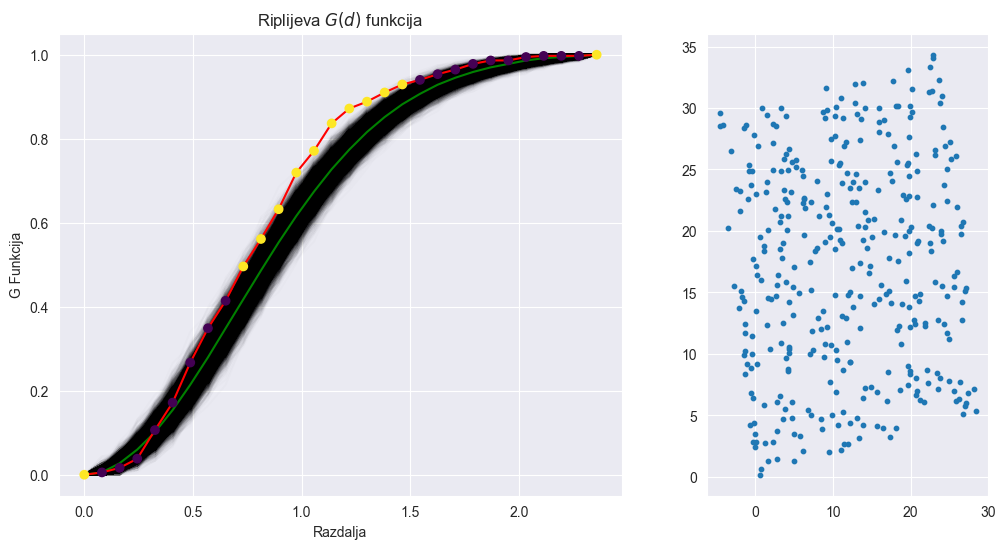

In [81]:
f, ax = plt.subplots(1, 2, figsize=(12,6), gridspec_kw=dict(width_ratios=(10, 5)))

ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax[0].plot(g_test.support, np.median(g_test.simulations, axis=0), color='green', label='mediana simulacij')

ax[0].plot(g_test.support, g_test.statistic, color='red', label='opazovano')
ax[0].scatter(g_test.support, g_test.statistic, cmap='viridis', c=g_test.pvalue < .01, zorder=4)

ax[1].scatter(*numpy_array.T, s=10)

ax[0].set_xlabel('Razdalja')
ax[0].set_ylabel('G Funkcija')
ax[0].set_title('Riplijeva $G(d)$ funkcija')
plt.show()

In [94]:
g_test.pvalue

array([0.000e+00, 2.853e-01, 1.373e-01, 8.300e-02, 4.212e-01, 2.569e-01,
       3.480e-02, 1.300e-02, 1.850e-02, 7.200e-03, 9.600e-03, 4.200e-03,
       3.000e-04, 3.000e-04, 1.000e-04, 1.000e-04, 2.000e-04, 7.000e-04,
       1.600e-03, 1.200e-02, 2.260e-02, 4.160e-02, 1.970e-02, 1.670e-02,
       1.241e-01, 3.990e-02, 4.450e-02, 1.660e-01, 4.610e-01, 0.000e+00])

In [65]:
ripley.g_function(numpy_array)

(array([0.        , 0.12412004, 0.24824008, 0.37236012, 0.49648015,
        0.62060019, 0.74472023, 0.86884027, 0.99296031, 1.11708035,
        1.24120038, 1.36532042, 1.48944046, 1.6135605 , 1.73768054,
        1.86180058, 1.98592061, 2.11004065, 2.23416069, 2.35828073]),
 array([0.        , 0.01089918, 0.04359673, 0.14168937, 0.27247956,
        0.38692098, 0.51498638, 0.61580381, 0.73297003, 0.81743869,
        0.8719346 , 0.90190736, 0.9373297 , 0.95367847, 0.96730245,
        0.98637602, 0.98910082, 0.9972752 , 0.9972752 , 1.        ]))

<p>Na absciso nanesemo razdalje do točk (d), na ordinato pa delež razdalj najbližjega soseda, manjših od <em><strong>d</strong></em>. Po tem lahko torej sklepamo, da bo funkcija <em><strong>G(d)</strong></em> pri gručastih točkovnih vzorcih narasla veliko hitreje kot simulirane vrednosti, saj so razdalje do najbližjega soseda pri gručastih vzorcih manjše kot pa tiste pri razpršenih vzorcih.<br>
Ker funkcija <em>g_test()</em> izračuna tudi p-vrednosti, so na grafu ponazorjene tudi te. p-vrednosti manjše od 0.01 so obarvane z rumeno, z vijolično pa tiste, ki imajo p-vrednost višjo kot 0.01.</p>

<h5>F funkcija</h5>
<p>Če funkcija <em><strong>G(d)</strong></em> deluje tako, da analizira razdaljo med točkami v vzorcu, funkcija <em><strong>F(d)</strong></em> deluje tako, da meri razdaljo najbližjega soseda od niza znanih naključno porazdeljenih točk do točke v opazovanem vzorcu. Zato se funkcija <em><strong>F(d)</strong></em> imenuje tudi "funkcija praznega prostora", saj označuje tipično razdaljo od poljubnih točk v praznem prostoru, do vzorca točk.<br>
Za naključno simuliran točkovni vzorec velikosti <em><strong>N<sub>s</sub></strong></em>, zaradi česar je funkcija:</p>
<p>**Enačba je v word datoteki**<sup>[4]</sup></p>
<p>To pomeni, da ima lahko funkcija <em><strong>N<sub>s</sub></strong></em> možnih vrednosti za vsak <em><strong>d</strong></em> in posledično daje veliko bolj natančen vpogled v točkovni vzorec.</p>

In [77]:
f_test = ripley.f_test(points, support=30, keep_simulations=True)

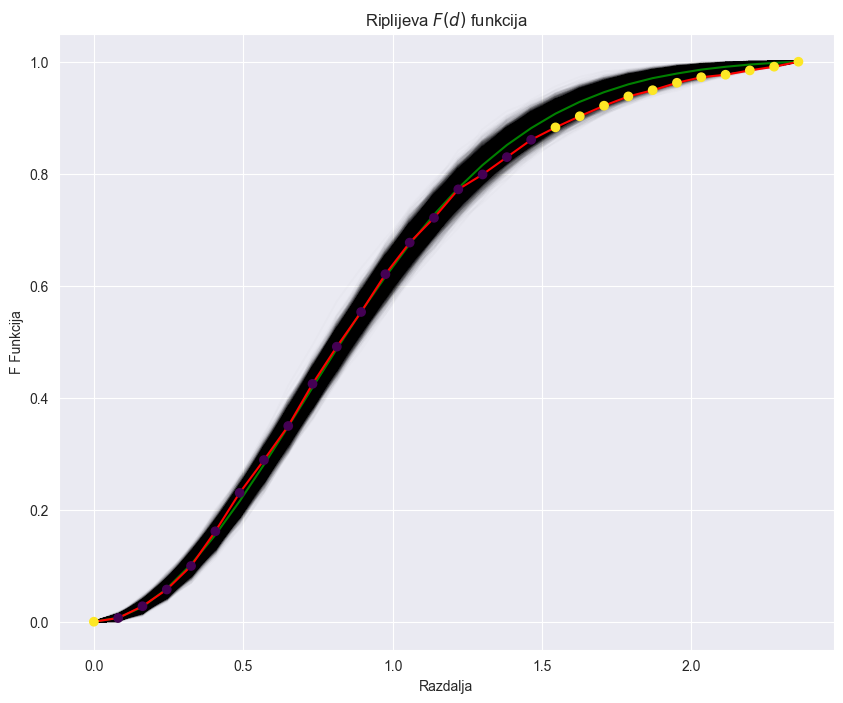

In [82]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(f_test.support, f_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(f_test.support, np.median(f_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(f_test.support, f_test.statistic, color='red', label='opazovano')
ax.scatter(f_test.support, f_test.statistic, cmap='viridis', c=f_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('F Funkcija')
ax.set_title('Riplijeva $F(d)$ funkcija')
plt.show()

<p>Glede na to, da vrednosti funkcije <em><strong>G(d)</strong></em> naraščajo približno enako hitro kot simulirane vrednosti, lahko sklepamo, da je površina praznega prostora v našem vzorcu podobna tisti pri naključno generiranih vzorcih.</p>

<h3>Funkcije interventne razdalje</h3>
<p>Čeprav sta funkciji <em><strong>F(d)</strong></em> in <em><strong>G(d)</strong></em> uporabni, upoštevata le razdaljo med vsako točko <em>i</em> in njeno najbližjo sosedo. Če je <em><strong>d<sup>*</sup><sub>i</sub></strong></em> razdalja in <em><strong>d<sub>ij</sub></strong></em> razdalja med <em>i</em> in <em>j</em>, je za <em><strong>F(d)</strong></em> in <em><strong>G(d)</strong></em> edini pomemben izraz <em><strong>d<sup>*</sup><sub>i</sub></strong></em>. Če se <em><strong>d<sub>ij</sub></strong></em> spreminja (a <em>j</em> ni bližje <em>i</em>), potem funkciji <em><strong>F(d)</strong></em> in <em><strong>G(d)</strong></em> ostajata enaki.<br>
Zato so bile razvite nadaljnje statistične funkcije, ki upoštevajo celotno porazdelitev razdalje, ne le razdalje najbližjih sosedov. Ti funkciji sta <em><strong>K(d)</strong></em> in <em><strong>L(d)</strong></em>.</p>

<h4>K funkcija</h4>
<p><em><strong>K(d)</strong></em> funkcija je različica funkcije kumulativne gostote za vse razdalje znotraj točkovnega vzorca. Kot take je sorodna <em><strong>G(d)</strong></em> funkciji, ki prav tako upošteva vse razdalje, ne le razdalj najbližjih sosedov. Praktično si lahko funkcijo <em><strong>K(d)</strong></em> predstavljamo kot odstotek vseh razdalj, ki so manjše od <em><strong>d</strong></em>. Zato je za mejno razdaljo <em><strong>d</strong></em> funkcija definirana kot:</p>
<p>**Enačba je v word datoteki**<sup>[5]</sup></p>
<p>Kjer je λ <em>intenzivnost</em> točkovnega procesa. To predstavlja povprečno koliko točk dobimo na enoto površine. Velike vrednosti λ pomenijo veliko točk na površino, majhne vrednosti λ pa malo točk na površino. Generalno tega parametra ne poznamo in ga je treba zmodelirati preko povprečnega števila točk na preučevani površini. To predpostavlja, da je intenzivnost točkovnega vzorca konstantna ali homogena na preučevanem območju.</p>

In [25]:
k_test = ripley.k_test(points, support=30, keep_simulations=True)

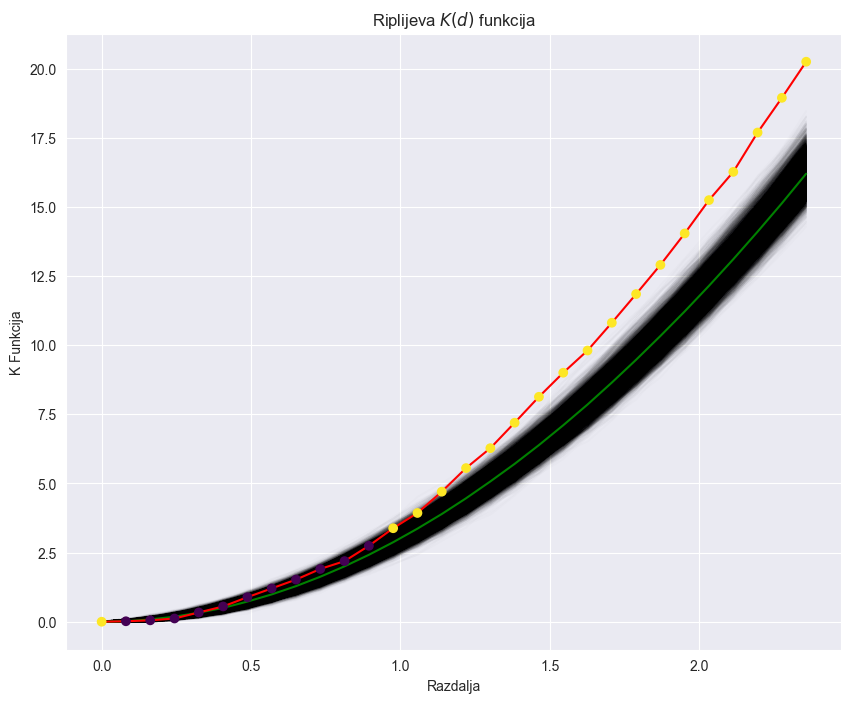

In [26]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(k_test.support, np.median(k_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(k_test.support, k_test.statistic, color='red', label='opazovano')
ax.scatter(k_test.support, k_test.statistic, cmap='viridis', c=k_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('K Funkcija')
ax.set_title('Riplijeva $K(d)$ funkcija')
plt.show()

<p>Pri razdaljah večjih od 1m je funkcija opazovanih vrednosti nad simuliranimi, kar nakazuje na rahlo grupiranje.</p>

<p><em><strong>L(d)</strong></em> funkcija je pomanjšana različica funkcije <em><strong>K(d)</strong></em>, definirana za pomoč pri interpretaciji. Pričakovana vrednost funkcije <em><strong>K(d)</strong></em> narašča z <em><strong>d</strong></em>; to je smiselno, saj se bo število parov točk z razdaljo manjšo od <em><strong>d</strong></em> večalo z <em><strong>d</strong></em>. Torej lahko definiramo normalizacijo <em><strong>K(d)</strong></em>, ki odstrani naraščanje z <em><strong>d</strong></em>.
<p>**Enačba je v word datoteki**<sup>[6]</sup></p>

In [27]:
l_test = ripley.l_test(points, support=30, keep_simulations=True)

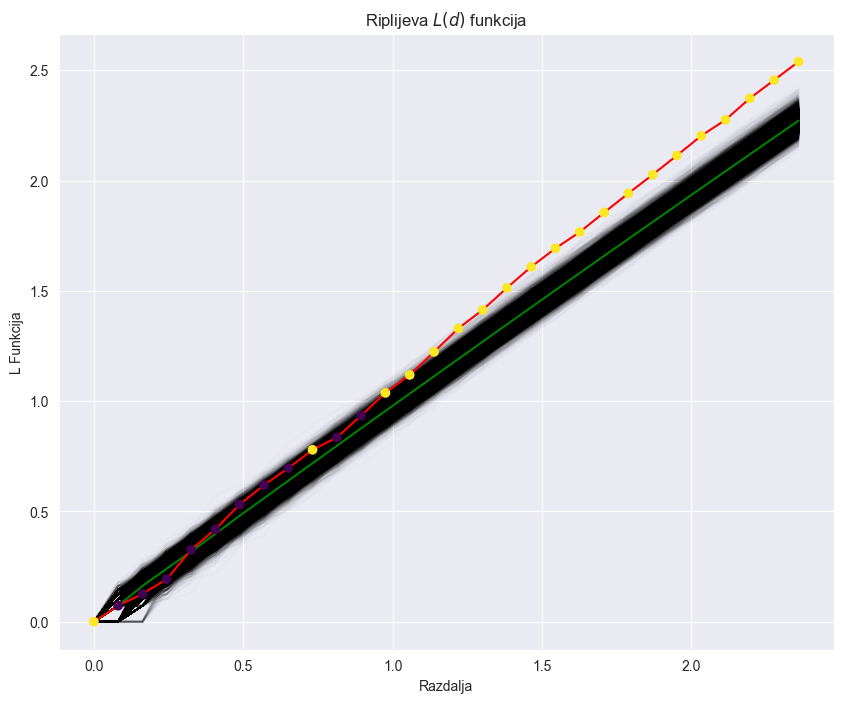

In [28]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(l_test.support, l_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(l_test.support, np.median(l_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(l_test.support, l_test.statistic, color='red', label='opazovano')
ax.scatter(l_test.support, l_test.statistic, cmap='viridis', c=l_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('L Funkcija')
ax.set_title('Riplijeva $L(d)$ funkcija')
plt.show()

<h3>Clark-Evansov indeks</h3>
<p>Clark-Evansov indeks agregacije (R) je najstarejša in najpogosteje uporabljena metoda ugotavljanja vzorcev razmestitve dreves v sestojih.</p>

In [29]:
def ClarkEvans(coordinates):

    shape = centrography.hull(coordinates)
    
    area = Polygon(shape).area

    N = np.shape(coordinates)[0]
    
    nnd = KDTree(coordinates, leaf_size=30, metric='euclidean')
    dists, ids = nnd.query(coordinates, k=2)
    dists = dists[:, 1]

    x_obs = np.mean(dists)
    x_pois = 1/(2 * np.sqrt(N/area))

    return x_obs/x_pois

In [30]:
def ClarkEvans_CSR(polygon, n_pts, realizations):
    
    def ClarkEvans(coordinates):
        shape = centrography.hull(coordinates)
        area = Polygon(shape).area
        N = np.shape(coordinates)[0]
        nnd = KDTree(coordinates, leaf_size=30, metric='euclidean')
        dists, ids = nnd.query(coordinates, k=2)
        dists = dists[:, 1]
        x_obs = np.mean(dists)
        x_pois = 1/(2 * np.sqrt(N/area))
        return x_obs/x_pois

    window = Window(polygon)
    samples = PoissonPointProcess(window=window, n=n_pts, samples=realizations, conditioning=False, asPP=False)

    matrix = np.zeros(shape=(realizations, 1))

    for i in range(realizations):
        real = samples.realizations[i]
        matrix[i] = ClarkEvans(coordinates=real)
    
    return matrix

In [31]:
dumb_list = [[(-4.528, 29.606),
       (-4.597, 28.524),
       (-3.463, 20.283),
       (-2.692, 15.494),
       (-0.67 ,  4.206),
       (-0.249,  2.813),
       (0.627,  0.183),
       (17.355,  3.23),
       (28.402,  5.345),
       (26.746, 20.751),
       (25.813, 26.097),
       (23.641, 32.25 ),
       (22.866, 34.332)]]

CE = ClarkEvans(numpy_array)

CE_CSR = ClarkEvans_CSR(dumb_list, n_pts=numpy_array.shape[0], realizations=1000)

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages

In [36]:
print('Clark-Evansov indeks: ' + str(CE))
print('Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: ' + str(CE_CSR))

Clark-Evansov indeks: 1.0280651356828694
Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: [[1.07026581]
 [1.03814005]
 [1.06203626]
 [1.06281764]
 [1.05639454]
 [1.02786243]
 [1.06931944]
 [1.08338088]
 [1.03558807]
 [1.04786826]
 [1.04912742]
 [1.0585391 ]
 [1.10336747]
 [1.08689754]
 [1.09719618]
 [1.08176484]
 [1.05175373]
 [0.99067848]
 [1.07196854]
 [1.05941556]
 [1.00750903]
 [1.03697631]
 [1.02303397]
 [1.06349435]
 [1.08532647]
 [1.04003973]
 [1.0562277 ]
 [1.03729714]
 [1.03799796]
 [1.02339145]
 [1.09984816]
 [1.06123552]
 [1.00147536]
 [1.00955846]
 [1.04342881]
 [1.05265456]
 [1.04553609]
 [1.01620146]
 [1.05070365]
 [1.00979901]
 [1.11252038]
 [1.05386039]
 [1.03516293]
 [1.0340617 ]
 [1.01790712]
 [1.05280302]
 [1.0380701 ]
 [1.04960877]
 [1.05651324]
 [1.02836728]
 [1.04747466]
 [1.02194805]
 [1.03279516]
 [1.04013441]
 [1.04987529]
 [1.07882226]
 [1.05974291]
 [1.09914547]
 [1.06639663]
 [1.02611108]
 [1.03877434]
 [1.07330141]
 [1.04925456]
 [1.07765165]
 

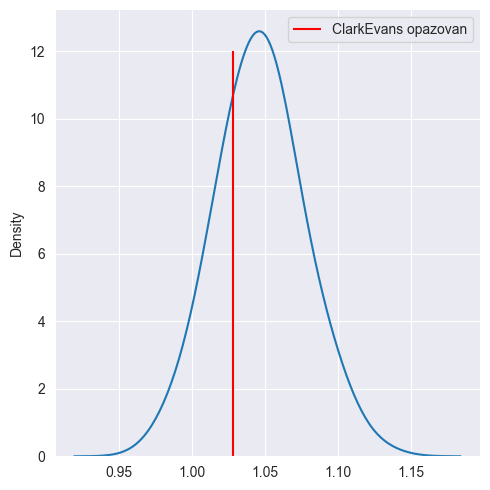

In [33]:
sns.displot(x=CE_CSR[:, 0], kind='kde', bw_adjust=2)
plt.vlines(CE, 12, 0, color='r', label='ClarkEvans opazovan')
plt.legend()

<h3>Identifikacija gruč</h3>
<p>Če vemo, da je točkovni vzorec združen v gruče, nam to ne daje nujno informacij o tem, kje se te gruče nahajajo.</p>

In [37]:
cluster_count = np.round(points.shape[0] *0.01)
cluster_count

4.0

In [38]:
clusterer = DBSCAN(eps=1, min_samples=int(cluster_count))
clusterer.fit(points[['X_m', 'Y_m']])

DBSCAN(eps=1, min_samples=4)

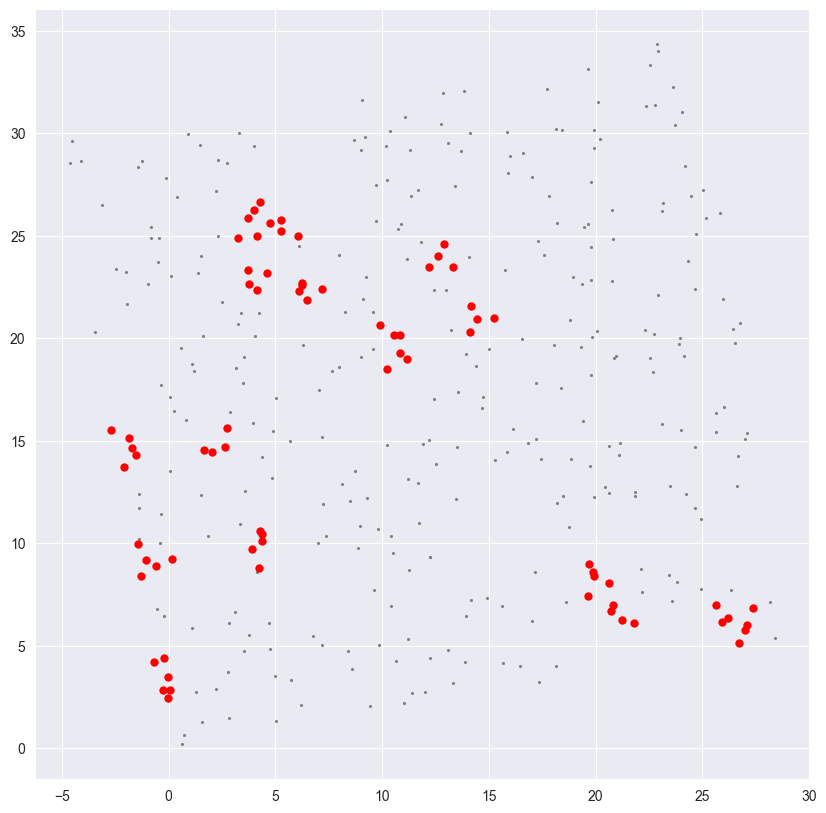

In [39]:
lbls = pd.Series(clusterer.labels_, index=points.index)

f, ax = plt.subplots(1, figsize=(10,10))

noise = points.loc[lbls == -1, ['X_m', 'Y_m']]

ax.scatter(noise.X_m, noise.Y_m, c='grey', s=5, linewidth=0)
ax.scatter(points.loc[points.index.difference(noise.index), 'X_m'], points.loc[points.index.difference(noise.index), 'Y_m'], c='red', linewidth=0)

plt.show()

<p>V tem primeru smo predpostavili, da potrebuje gruča vsebovatu vsaj 1% vseh točk in imeti maksimalni radij 1m. Pod temi predpostavkami, je mogoče določiti nekaj gruč, ki so označene z rdečimi pikami.</p>


<h3>Ploskev 3 po 21 letih</h3>

In [40]:
def make_X_Y(df, ser):
    notnull = ser.notnull()

    df_new = np.multiply(df, notnull)

    Coordinates = df_new.replace(0, np.nan)
    Coordinates = Coordinates.dropna(how='all', axis=0)
    Coordinates = Coordinates.replace(np.nan, 0)
    return Coordinates

In [42]:
points_21 = make_X_Y(df=ploskev_2_in_3_df[0][['X_m', 'Y_m']], ser=ploskev_2_in_3_df[0][['DBH_21_mm']])
points_21

C:\Users\gaber\AppData\Local\Temp\ipykernel_31736\1276357407.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  df_new = np.multiply(df, notnull)


,X_m,Y_m
1,0.724,0.620
6,5.722,3.319
7,6.182,2.100
8,4.742,4.813
9,3.543,4.714
...,...,...
355,22.376,31.330
361,19.948,30.152
362,20.189,29.700
363,19.941,29.295


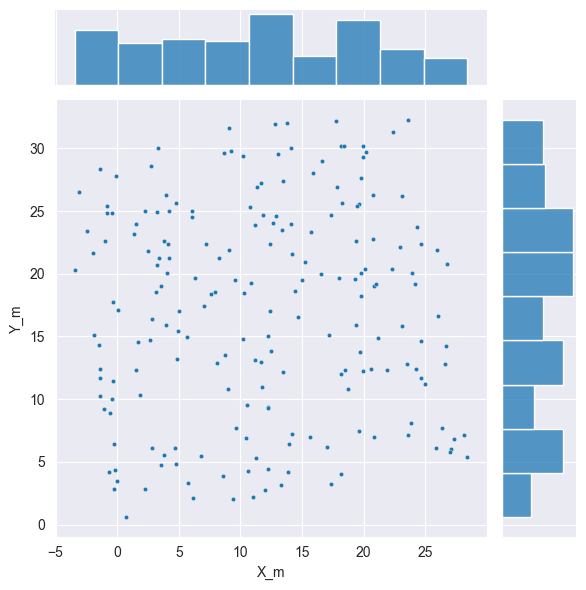

In [43]:
sns.jointplot(x=points_21.X_m, y=points_21.Y_m, s=10)

plt.show()

<p>Točke(drevesa), ki so na ploskvi ostala.</p>

In [44]:
numpy_array_21 = points_21.to_numpy()

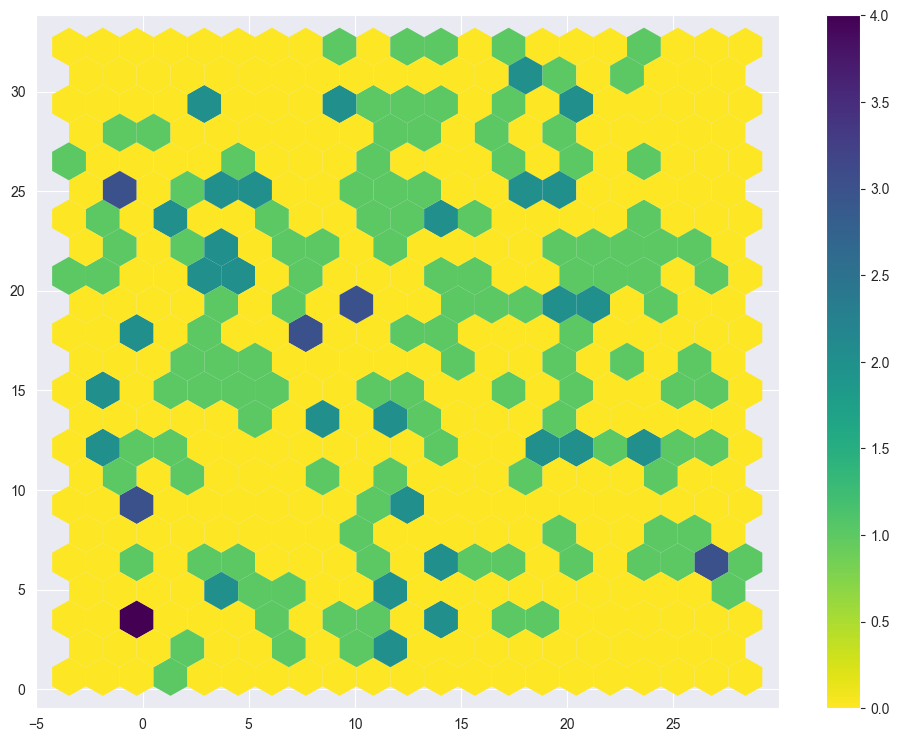

In [45]:
f, ax = plt.subplots(1, figsize=(12, 9))

hb = ax.hexbin(points_21.X_m, points_21.Y_m, gridsize=20, linewidths=0, alpha=1, cmap='viridis_r')

plt.colorbar(hb)
plt.show()

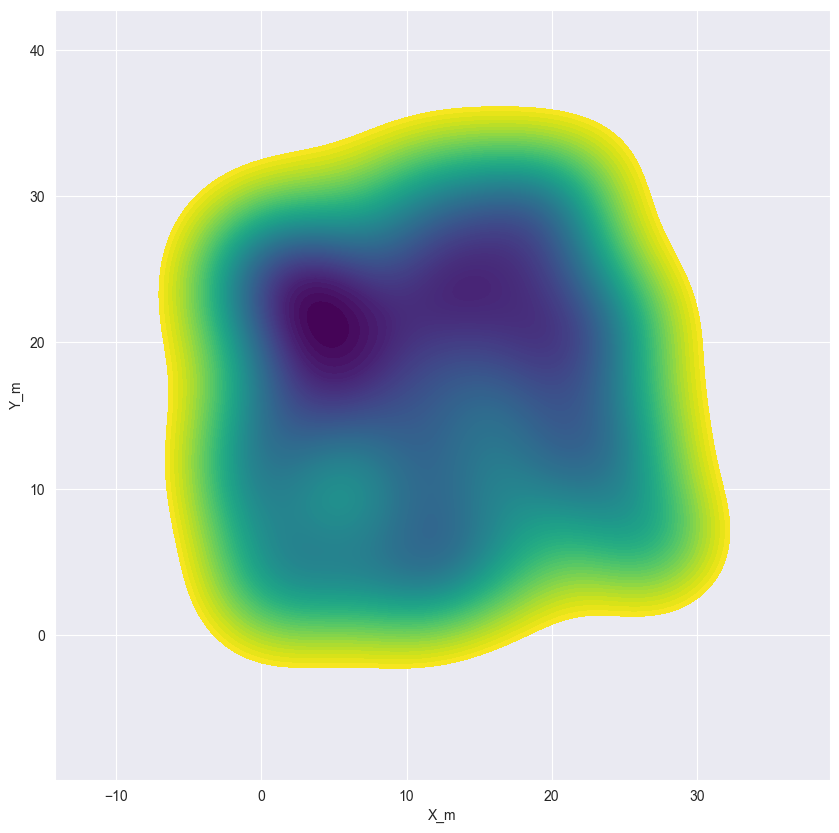

In [47]:
f, ax = plt.subplots(1, figsize=(10,10))

sns.kdeplot(x=points_21.X_m, y=points_21.Y_m, n_levels=100, fill=True, alpha=1, cmap='viridis_r')

plt.show()

In [48]:
mean_center = centrography.mean_center(points_21[['X_m', 'Y_m']])
median_center = centrography.euclidean_median(points_21[['X_m', 'Y_m']])
print('Središče mase za ploskev po 21 letih: ' + str(mean_center))
print('Medianino središče za ploskev po 21 letih: ' + str(median_center))

Središče mase za ploskev po 21 letih: [11.78143434 16.98765152]
Medianino središče za ploskev po 21 letih: [11.62508687 17.48699175]


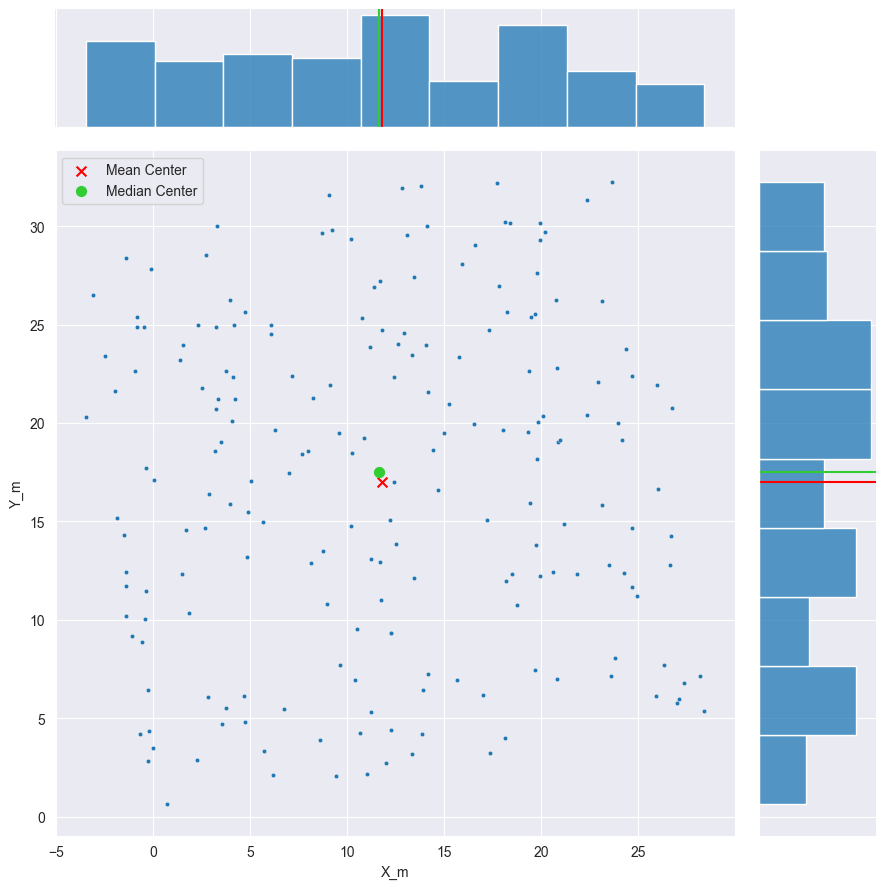

In [50]:
joint_axes = sns.jointplot(x=points_21.X_m, y=points_21.Y_m, s=10, height=9)

joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

joint_axes.ax_joint.scatter(*median_center, color='limegreen', marker='o', s=50, label='Median Center')

joint_axes.ax_marg_x.axvline(median_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(median_center[1], color='limegreen')

joint_axes.ax_joint.legend()

plt.show()

In [51]:
std_dist = centrography.std_distance(points_21[['X_m', 'Y_m']])
print('Standardna razdalja na ploskvi po 21 letih: ' + str(std_dist))

Standardna razdalja na ploskvi po 21 letih: 12.058481601065589


In [78]:
major, minor, rotation = centrography.ellipse(points_21[['X_m', 'Y_m']])
print('Dolžina: ' + str(major))
print('Višina: ' + str(minor))
print('Orientacija: ' + str(rotation))

Dolžina: 11.901021397971585
Višina: 12.110632520289705
Orientacija: 1.1674735371267049


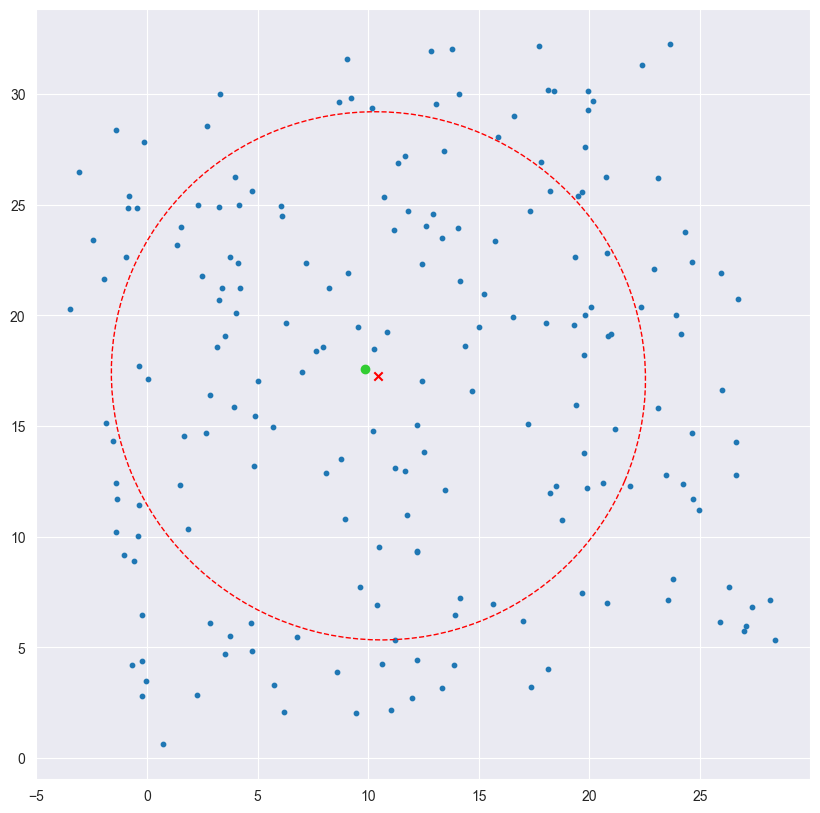

In [80]:
f, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(x=points_21.X_m, y=points_21.Y_m, s=10)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*median_center, color='limegreen', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, width=major * 2, height=minor * 2, angle=np.rad2deg(rotation), facecolor='none', edgecolor='red', linestyle='--',label='Std. Ellipse')

ax.add_patch(ellipse)

plt.show()

<p>Na podlagi grafikonov za vizualizacijo ter centrografičnih analiz med ploskvama ni bistvenih razlik, razen tega, da je gostota precej nižja.</p>

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


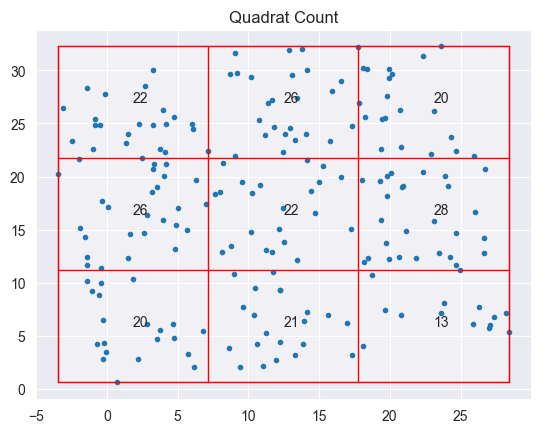

In [54]:
qstat = QStatistic(numpy_array_21)
qstat.plot()

In [55]:
qstat.chi2_pvalue

0.5171491070985661

<p>Tu je p-vrednost precej večja kot na prejšnji ploskvi.</p>

In [56]:
k_test = ripley.k_test(points_21, support=30, keep_simulations=True)

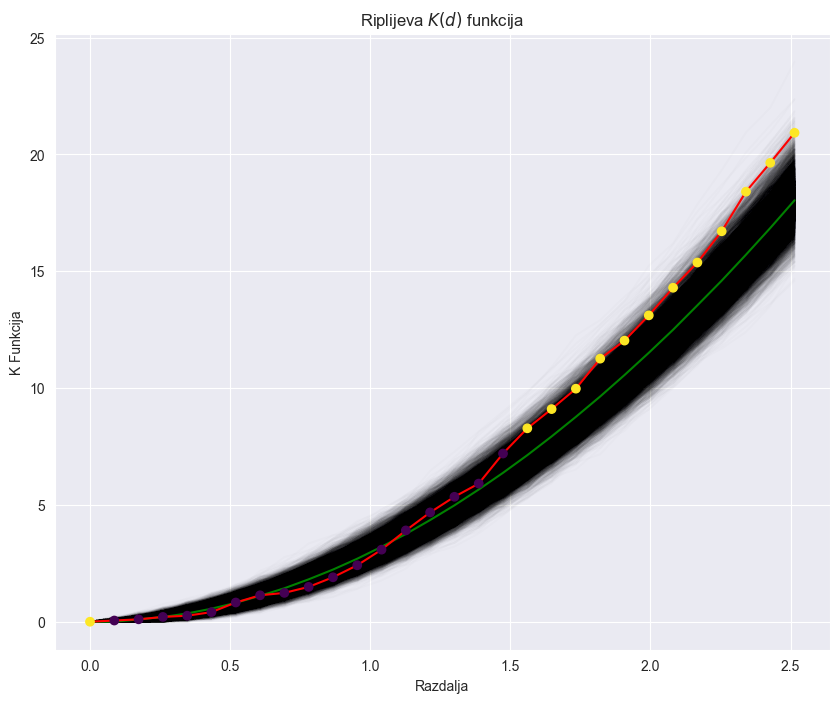

In [57]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(k_test.support, np.median(k_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(k_test.support, k_test.statistic, color='red', label='opazovano')
ax.scatter(k_test.support, k_test.statistic, cmap='viridis', c=k_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('K Funkcija')
ax.set_title('Riplijeva $K(d)$ funkcija')
plt.show()

<p>Očitno krivulje K(d) funkcije za ploskev po 21 letih precej bolje sledi simuliranim ovojnicam, kar pomeni, da redčenja povečujejo naključno razporeditev dreves. To je smiselno, saj z redčenjem odstranjujemo gruče.</p>

In [96]:
convex_hull = centrography.hull(points_21)
convex_hull

array([[28.402,  5.345],
       [26.746, 20.751],
       [23.641, 32.25 ],
       [17.722, 32.17 ],
       [13.816, 32.03 ],
       [12.846, 31.948],
       [ 9.058, 31.595],
       [ 3.297, 29.997],
       [-1.411, 28.358],
       [-3.096, 26.492],
       [-3.463, 20.283],
       [-0.67 ,  4.206],
       [-0.249,  2.813],
       [ 0.724,  0.62 ],
       [11.013,  2.183],
       [17.355,  3.23 ]])

In [59]:

CE = ClarkEvans(numpy_array_21)

CE_CSR = ClarkEvans_CSR(dumb_list, n_pts=numpy_array_21.shape[0], realizations=1000)

print('Clark-Evansov indeks po 21 letih: ' + str(CE))
print('Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: ' + str(CE_CSR))

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages

Clark-Evansov indeks po 21 letih: 1.0909330787642961
Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: [[1.03312831]
 [1.02248856]
 [1.07441232]
 [1.09879107]
 [1.0672672 ]
 [1.0625569 ]
 [1.09467682]
 [1.06336261]
 [1.10768699]
 [1.04627833]
 [1.075621  ]
 [1.05201007]
 [1.08836742]
 [1.05654239]
 [1.02061959]
 [1.05850871]
 [1.04115699]
 [1.03592581]
 [1.09728522]
 [0.9791343 ]
 [1.12237148]
 [1.12252962]
 [1.06779519]
 [1.08364784]
 [1.04644721]
 [1.09313998]
 [1.05517566]
 [1.08618172]
 [1.10537065]
 [1.17234303]
 [1.11091876]
 [1.11515017]
 [1.01718335]
 [1.09895274]
 [1.10357217]
 [1.03404398]
 [1.10388006]
 [1.04793533]
 [1.06845513]
 [1.04426248]
 [1.07067222]
 [1.08468334]
 [1.09030833]
 [1.05123932]
 [1.045805  ]
 [1.05730201]
 [1.09380333]
 [1.03881594]
 [1.08274385]
 [1.09001695]
 [1.08855583]
 [1.13697936]
 [1.05591112]
 [1.11811637]
 [1.07084627]
 [1.06920306]
 [1.10192496]
 [1.05028682]
 [1.07920592]
 [1.07762358]
 [1.04452202]
 [1.00281544]
 [1.03069673]
 [1

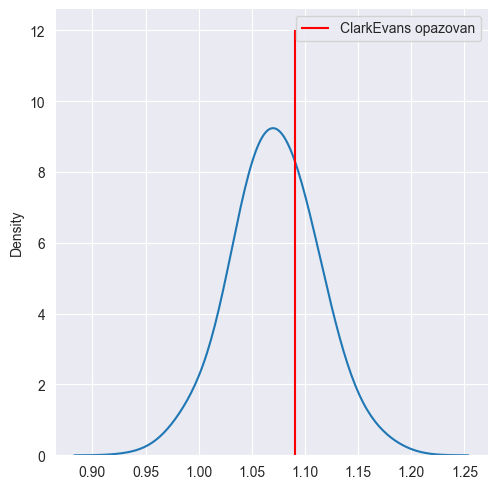

In [60]:
sns.displot(x=CE_CSR[:, 0], kind='kde', bw_adjust=2)
plt.vlines(CE, 12, 0, color='r', label='ClarkEvans opazovan')
plt.legend()

In [62]:
cluster_count_21 = np.round(points_21.shape[0] *0.01)

clusterer_21 = DBSCAN(eps=1, min_samples=int(cluster_count_21))
clusterer_21.fit(points_21[['X_m', 'Y_m']])


DBSCAN(eps=1, min_samples=2)

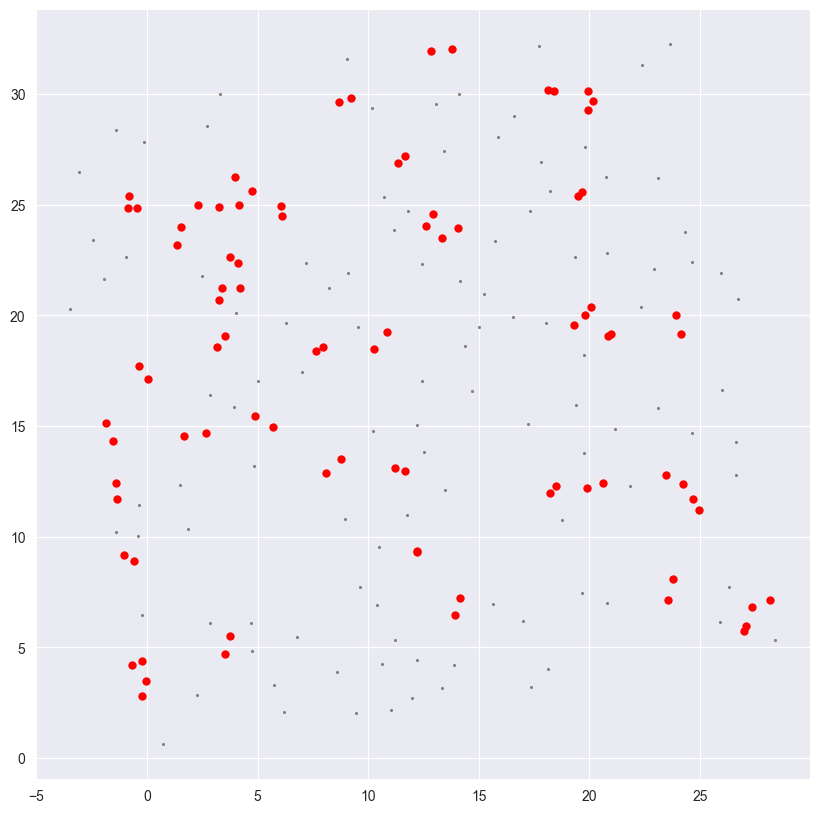

In [64]:
lbls = pd.Series(clusterer_21.labels_, index=points_21.index)

f, ax = plt.subplots(1, figsize=(10,10))

noise = points_21.loc[lbls == -1, ['X_m', 'Y_m']]

ax.scatter(noise.X_m, noise.Y_m, c='grey', s=5, linewidth=0)
ax.scatter(points_21.loc[points_21.index.difference(noise.index), 'X_m'], points_21.loc[points_21.index.difference(noise.index), 'Y_m'], c='red', linewidth=0)

plt.show()

<p>Algoritem sicer najde nekaj "gručastih" predelov, a je to zgolj zaradi tega, ker pri tem vzorcu, 1% točk pomeni le 2 točki znotraj 1m, kar pa ni zares gruča. **Parametre lahko seveda spremenim**</p>

<h3>Ploskev 2 - Kontrola</h3>

In [65]:
points_K = ploskev_2_in_3_df[1][['X_m', 'Y_m']].dropna(how='all')
points_K

,X_m,Y_m
0,0.000,1.634
1,0.896,3.723
2,0.849,5.088
3,1.995,2.795
4,2.073,2.646
...,...,...
305,3.962,15.939
306,3.448,15.307
307,3.740,14.754
308,4.199,14.631


In [66]:
numpy_array_K = points_K.to_numpy()

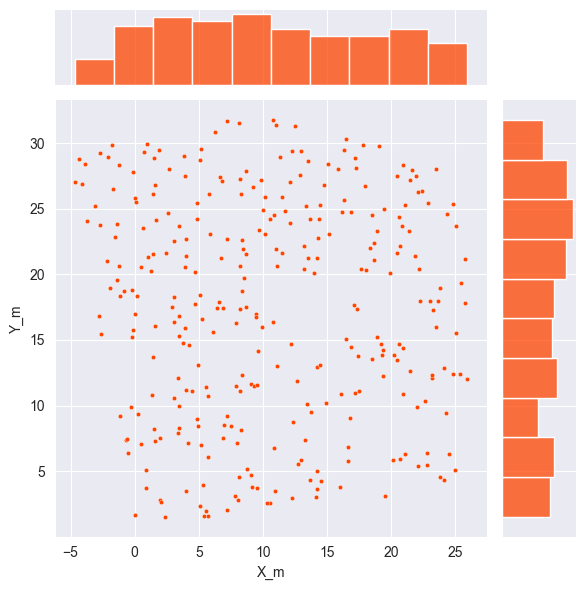

In [68]:
sns.jointplot(x=points_K.X_m, y=points_K.Y_m, s=10, color='orangered')

plt.show()

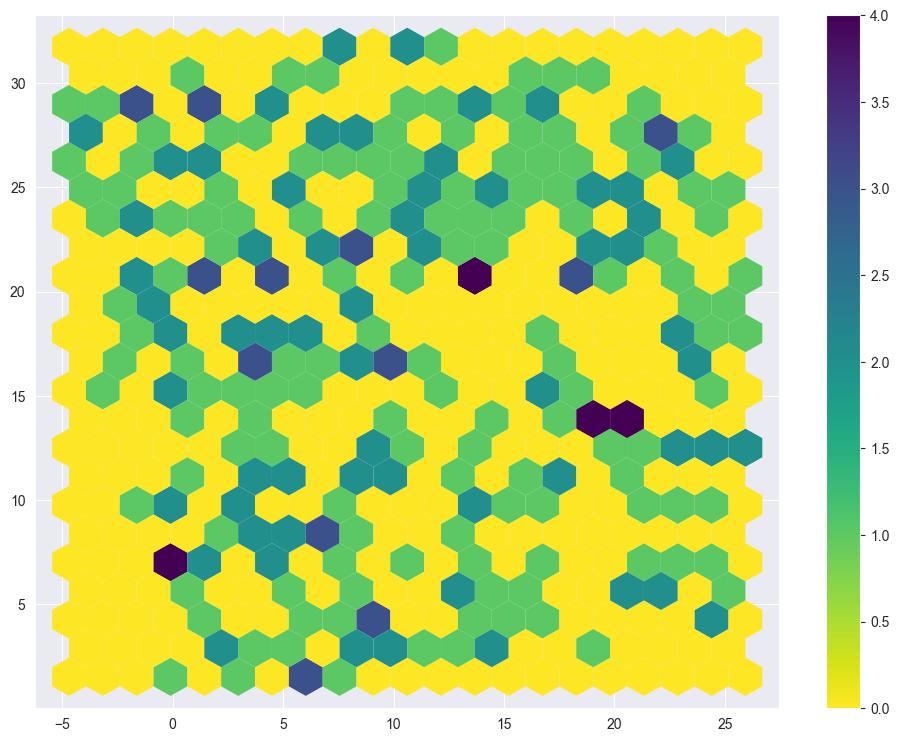

In [69]:
f, ax = plt.subplots(1, figsize=(12, 9))

hb = ax.hexbin(points_K.X_m, points_K.Y_m, gridsize=20, linewidths=0, alpha=1, cmap='viridis_r')

plt.colorbar(hb)
plt.show()

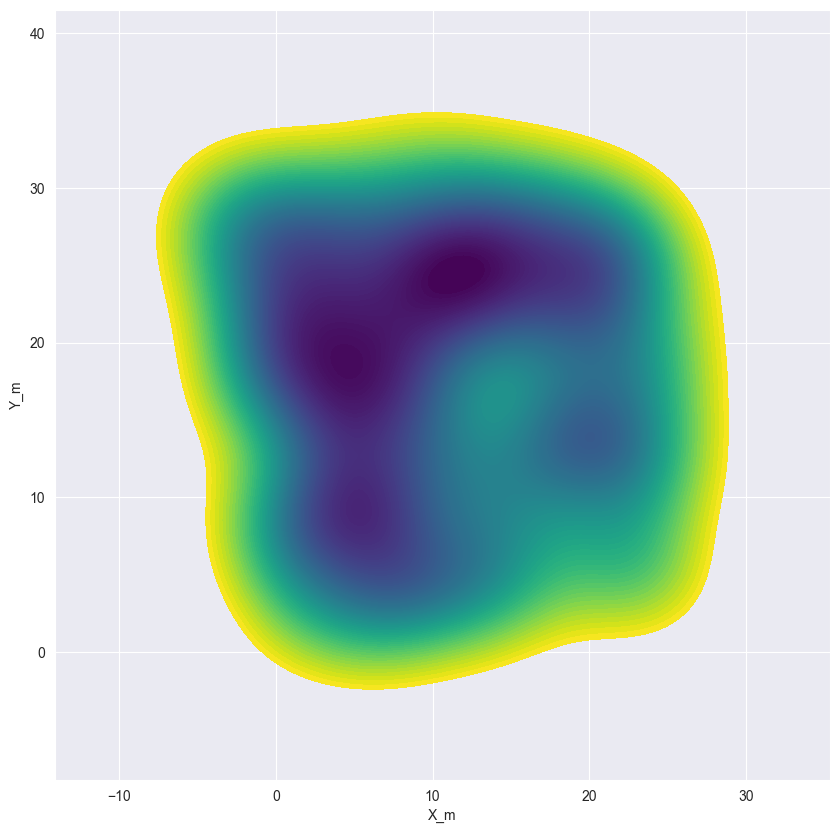

In [71]:
f, ax = plt.subplots(1, figsize=(10,10))

sns.kdeplot(x=points_K.X_m, y=points_K.Y_m, n_levels=100, fill=True, alpha=1, cmap='viridis_r')

plt.show()

In [72]:
mean_center = centrography.mean_center(points_K[['X_m', 'Y_m']])
median_center = centrography.euclidean_median(points_K[['X_m', 'Y_m']])
print('Središče mase za kontrolno ploskev: ' + str(mean_center))
print('Medianino središče za kontrolno ploskev: ' + str(median_center))

Središče mase za kontrolno ploskev: [10.46533226 17.26897097]
Medianino središče za kontrolno ploskev: [ 9.87146868 17.57034926]


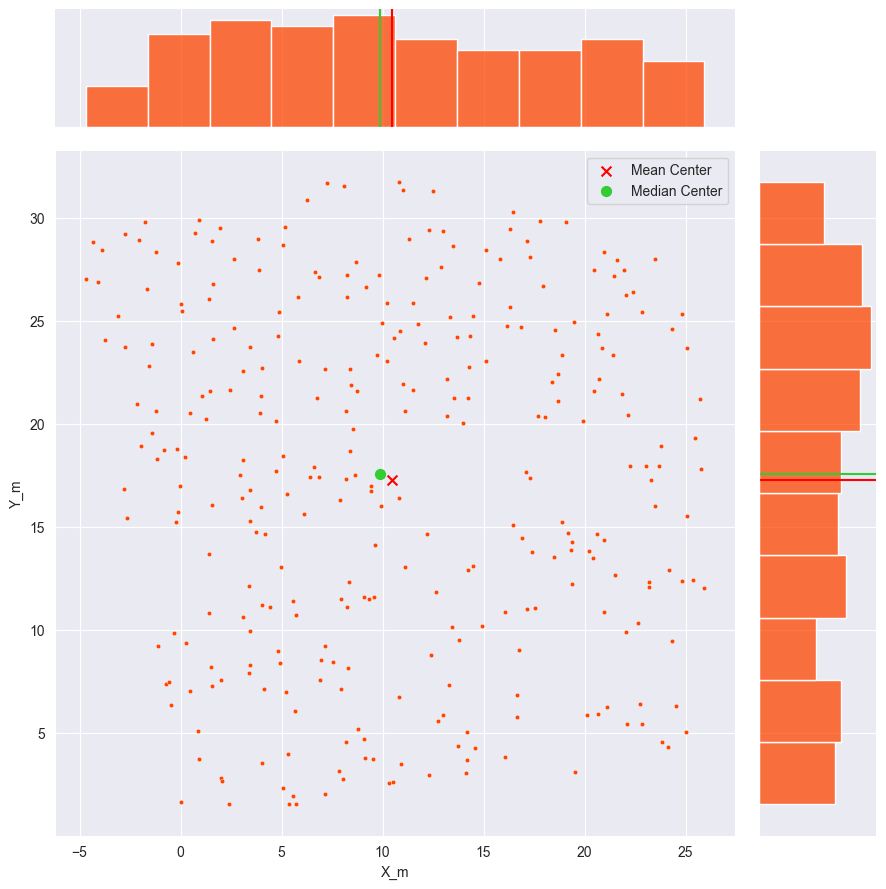

In [74]:
joint_axes = sns.jointplot(x=points_K.X_m, y=points_K.Y_m, s=10, height=9, color='orangered')

joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

joint_axes.ax_joint.scatter(*median_center, color='limegreen', marker='o', s=50, label='Median Center')

joint_axes.ax_marg_x.axvline(median_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(median_center[1], color='limegreen')

joint_axes.ax_joint.legend()

plt.show()

In [76]:
std_dist = centrography.std_distance(points_K[['X_m', 'Y_m']])
print('Standardna razdalja na kontrolni ploskvi: ' + str(std_dist))

Standardna razdalja na kontrolni ploskvi: 11.738276316216899


In [77]:
major, minor, rotation = centrography.ellipse(points_K[['X_m', 'Y_m']])
print('Dolžina: ' + str(major))
print('Višina: ' + str(minor))
print('Orientacija: ' + str(rotation))

Dolžina: 11.467104674965473
Višina: 11.794656877887233
Orientacija: -0.37766091514516914


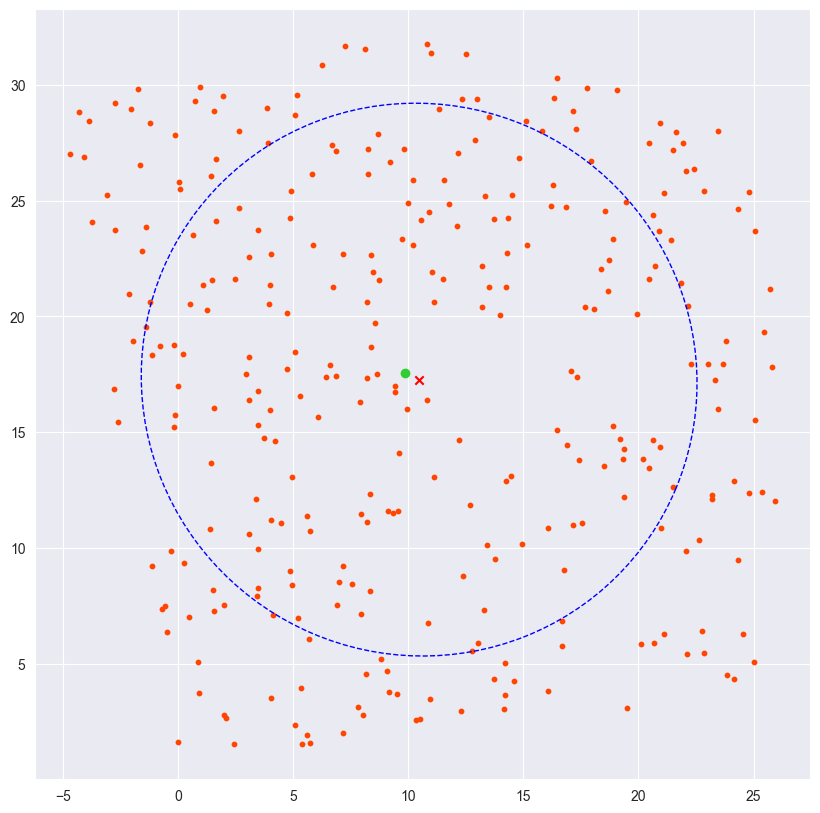

In [84]:
f, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(x=points_K.X_m, y=points_K.Y_m, s=10, color='orangered')
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*median_center, color='limegreen', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, width=major * 2, height=minor * 2, angle=np.rad2deg(rotation), facecolor='none', edgecolor='blue', linestyle='--',label='Std. Ellipse')

ax.add_patch(ellipse)

plt.show()

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


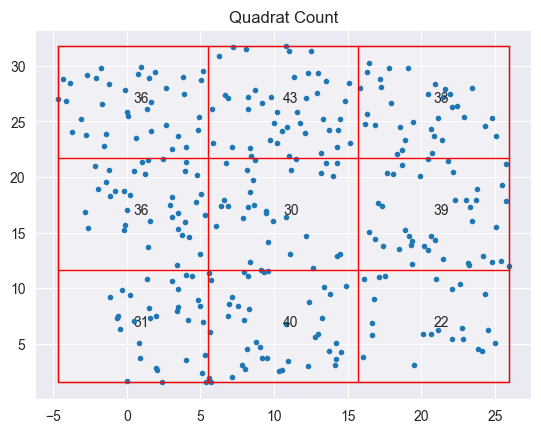

In [85]:
qstat = QStatistic(numpy_array_K)
qstat.plot()

In [86]:
qstat.chi2_pvalue

0.322560764012909

In [87]:
k_test = ripley.k_test(points_K, support=30, keep_simulations=True)

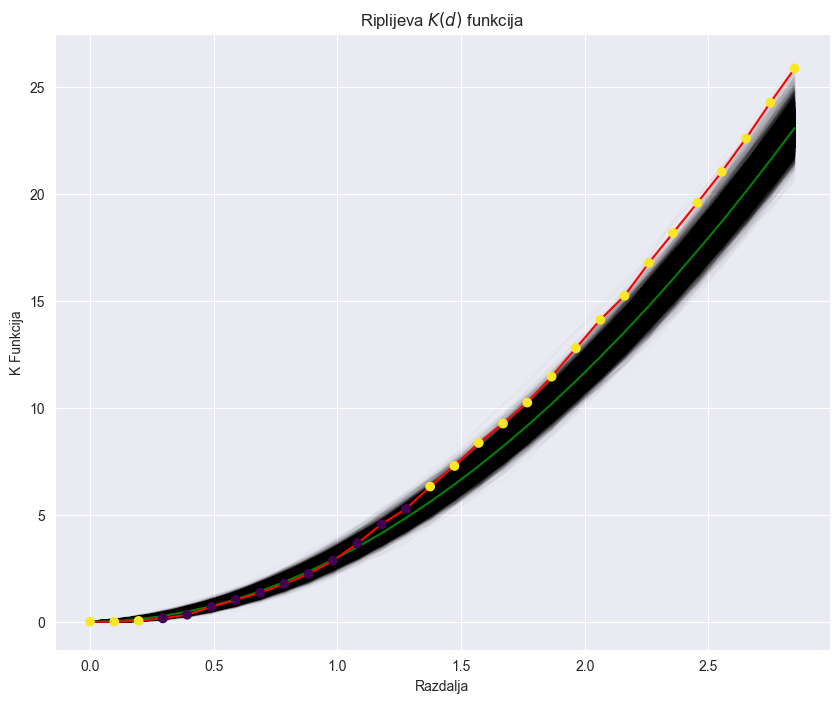

In [88]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(k_test.support, np.median(k_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(k_test.support, k_test.statistic, color='red', label='opazovano')
ax.scatter(k_test.support, k_test.statistic, cmap='viridis', c=k_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('K Funkcija')
ax.set_title('Riplijeva $K(d)$ funkcija')
plt.show()

In [92]:
k_test.pvalue

array([0.    , 0.    , 0.0485, 0.0603, 0.0602, 0.3809, 0.4287, 0.3184,
       0.3268, 0.2978, 0.4319, 0.2596, 0.0744, 0.0858, 0.0209, 0.0124,
       0.0052, 0.0088, 0.0107, 0.0062, 0.0022, 0.001 , 0.0025, 0.001 ,
       0.0008, 0.0009, 0.001 , 0.0008, 0.0005, 0.0005])

In [95]:
convex_hull = centrography.hull(points_K)
convex_hull

array([[ 0.   ,  1.634],
       [ 2.402,  1.524],
       [ 5.381,  1.554],
       [ 5.719,  1.57 ],
       [19.521,  3.088],
       [24.136,  4.324],
       [25.016,  5.063],
       [25.933, 12.045],
       [25.727, 21.187],
       [24.803, 25.351],
       [23.465, 28.009],
       [19.071, 29.776],
       [10.807, 31.747],
       [ 7.238, 31.692],
       [-1.756, 29.815],
       [-4.325, 28.807],
       [-4.691, 27.025],
       [-2.63 , 15.451]])

In [99]:
dumb_list_K = [[(0.   ,  1.634),
       (2.402,  1.524),
       (5.381,  1.554),
       (5.719,  1.57 ),
       (19.521,  3.088),
       (24.136,  4.324),
       (25.016,  5.063),
       (25.933, 12.045),
       (25.727, 21.187),
       (24.803, 25.351),
       (23.465, 28.009),
       (19.071, 29.776),
       (10.807, 31.747),
       (7.238, 31.692),
       (-1.756, 29.815),
       (-4.325, 28.807),
       (-4.691, 27.025),
       (-2.63 , 15.451)]]

CE_K = ClarkEvans(numpy_array_K)

CE_CSR_K = ClarkEvans_CSR(dumb_list_K, n_pts=numpy_array_K.shape[0], realizations=1000)

print('Clark-Evansov indeks za kontrolno ploskev: ' + str(CE_K))
print('Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: ' + str(CE_CSR_K))

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages

Clark-Evansov indeks za kontrolno ploskev: 1.0731321124826059
Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: [[1.05989275]
 [1.04928097]
 [1.04730643]
 [1.05144774]
 [1.08263146]
 [1.04872584]
 [1.05472406]
 [1.02735729]
 [1.14883556]
 [1.06245942]
 [1.0751558 ]
 [1.0102698 ]
 [1.0292463 ]
 [1.02843385]
 [1.01165369]
 [1.11111474]
 [1.06594627]
 [0.98653801]
 [1.01131904]
 [1.08435515]
 [1.00974374]
 [1.02862672]
 [1.07412153]
 [1.02308753]
 [1.05659618]
 [1.04079009]
 [1.06538626]
 [1.06285082]
 [1.06384174]
 [1.01223734]
 [1.07261796]
 [1.01354549]
 [1.03390775]
 [1.03854732]
 [1.09877848]
 [0.96373337]
 [1.05585233]
 [1.02835087]
 [1.03943979]
 [1.04526001]
 [1.04333951]
 [1.08194599]
 [1.03723394]
 [1.03797762]
 [1.0641896 ]
 [1.04140096]
 [1.05518895]
 [1.06398043]
 [1.00759372]
 [1.01545154]
 [1.02132247]
 [1.0830015 ]
 [1.10235503]
 [1.01791487]
 [1.05888032]
 [0.98772255]
 [1.00467186]
 [1.0266562 ]
 [1.11557767]
 [1.01185303]
 [1.08495782]
 [1.0488437 ]
 [1.0359

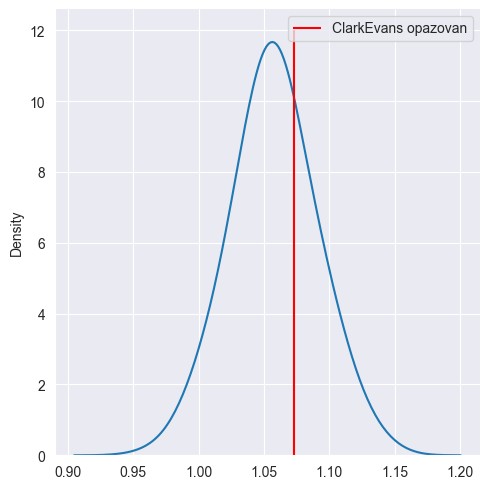

In [100]:
sns.displot(x=CE_CSR_K[:, 0], kind='kde', bw_adjust=2)
plt.vlines(CE_K, 12, 0, color='r', label='ClarkEvans opazovan')
plt.legend()

In [103]:
cluster_count_K = np.round(points_K.shape[0] *0.02)

clusterer_K = DBSCAN(eps=1, min_samples=int(cluster_count_K))
clusterer_K.fit(points_K[['X_m', 'Y_m']])

DBSCAN(eps=1, min_samples=6)

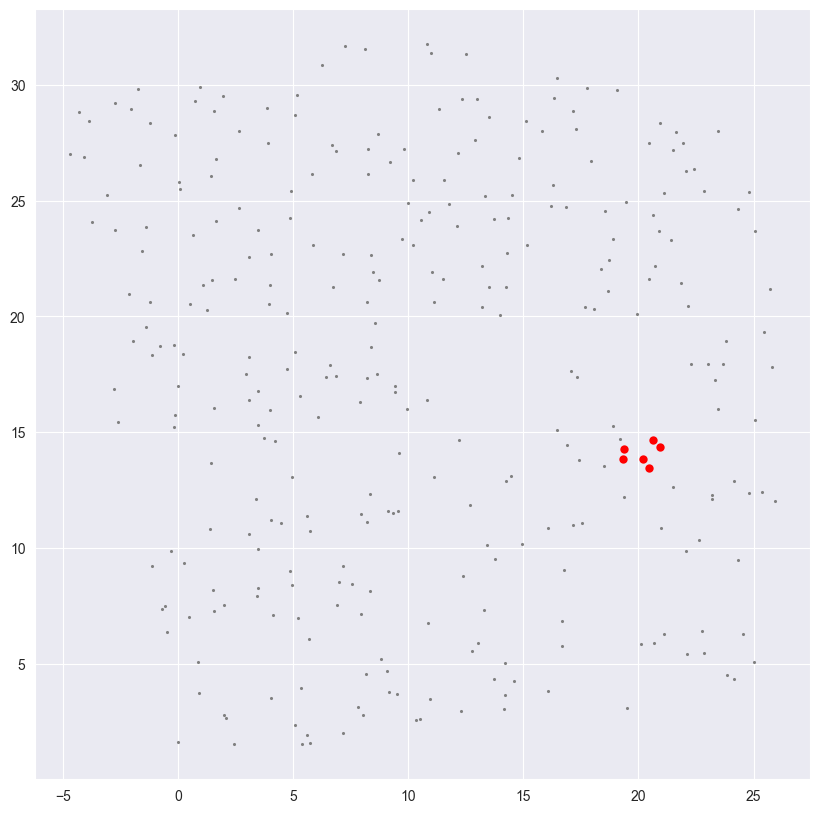

In [104]:
lbls = pd.Series(clusterer_K.labels_, index=points_K.index)

f, ax = plt.subplots(1, figsize=(10,10))

noise = points_K.loc[lbls == -1, ['X_m', 'Y_m']]

ax.scatter(noise.X_m, noise.Y_m, c='grey', s=5, linewidth=0)
ax.scatter(points_K.loc[points_K.index.difference(noise.index), 'X_m'], points_K.loc[points_K.index.difference(noise.index), 'Y_m'], c='red', linewidth=0)

plt.show()

<p>Tokrat mora gruča vsebovati vsaj 2% vseh točk (za ta vzorec je to 6)</p>

<h3>Kontrolna ploskev po 21 letih</h3>

In [105]:
points_K21 = make_X_Y(df=ploskev_2_in_3_df[1][['X_m', 'Y_m']], ser=ploskev_2_in_3_df[1][['DBH_21_mm']])
points_K21

C:\Users\gaber\AppData\Local\Temp\ipykernel_31736\1276357407.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  df_new = np.multiply(df, notnull)


,X_m,Y_m
0,0.000,1.634
1,0.896,3.723
2,0.849,5.088
3,1.995,2.795
4,2.073,2.646
...,...,...
304,3.051,16.385
305,3.962,15.939
307,3.740,14.754
308,4.199,14.631


In [106]:
numpy_array_K21 = points_K21.to_numpy()

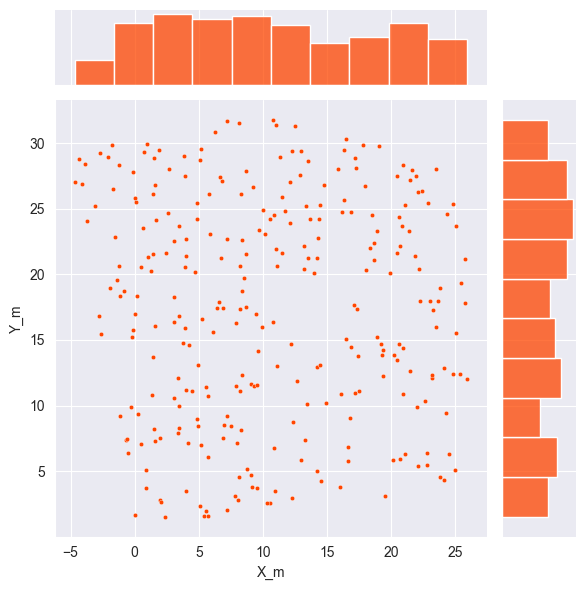

In [108]:
sns.jointplot(x=points_K21.X_m, y=points_K21.Y_m, s=10, color='orangered')

plt.show()

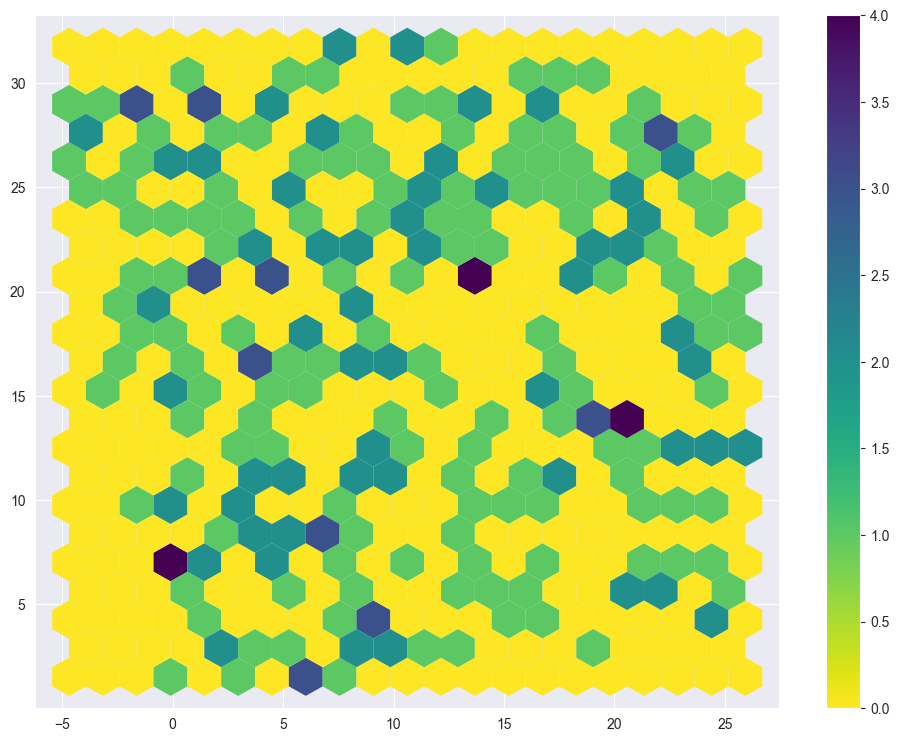

In [109]:
f, ax = plt.subplots(1, figsize=(12, 9))

hb = ax.hexbin(points_K21.X_m, points_K21.Y_m, gridsize=20, linewidths=0, alpha=1, cmap='viridis_r')

plt.colorbar(hb)
plt.show()

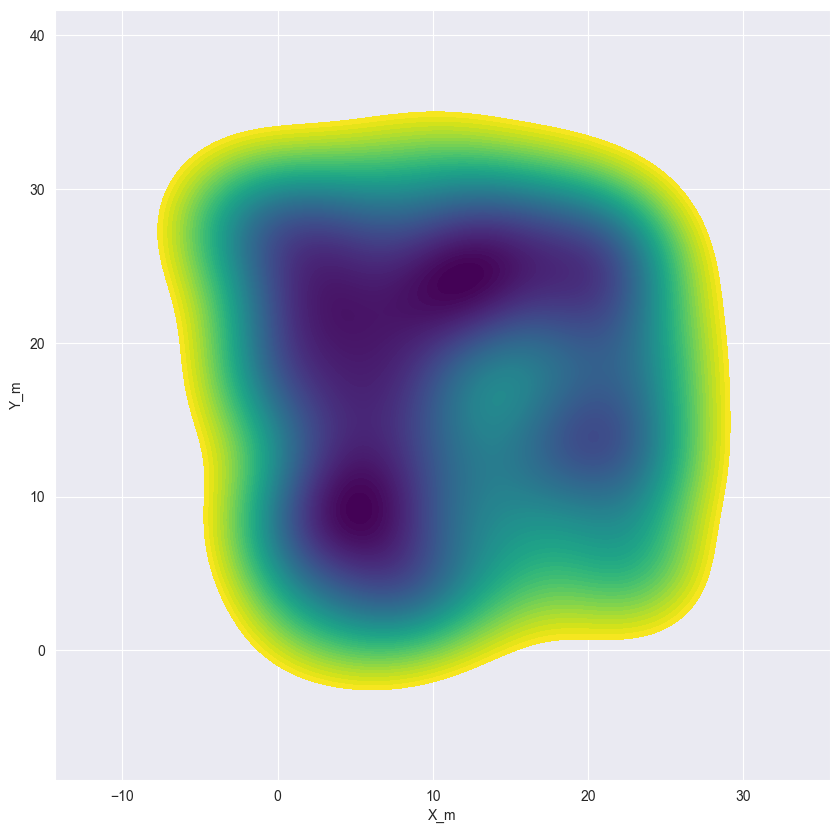

In [110]:
f, ax = plt.subplots(1, figsize=(10,10))

sns.kdeplot(x=points_K21.X_m, y=points_K21.Y_m, n_levels=100, fill=True, alpha=1, cmap='viridis_r')

plt.show()

In [111]:
mean_center = centrography.mean_center(points_K21[['X_m', 'Y_m']])
median_center = centrography.euclidean_median(points_K21[['X_m', 'Y_m']])
print('Središče mase za kontrolno ploskev po 21 letih: ' + str(mean_center))
print('Medianino središče za kontrolno ploskev po 21 letih: ' + str(median_center))

Središče mase za kontrolno ploskev po 21 letih: [10.58968881 17.26415035]
Medianino središče za kontrolno ploskev po 21 letih: [10.07756808 17.53636791]


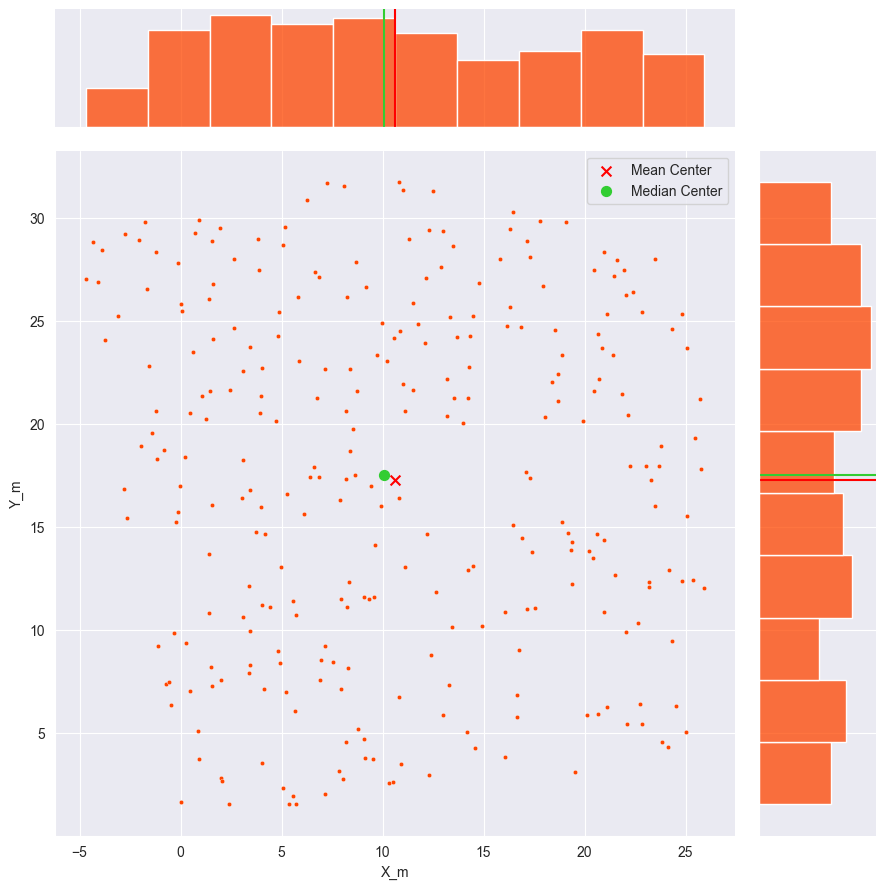

In [112]:
joint_axes = sns.jointplot(x=points_K21.X_m, y=points_K21.Y_m, s=10, height=9, color='orangered')

joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

joint_axes.ax_joint.scatter(*median_center, color='limegreen', marker='o', s=50, label='Median Center')

joint_axes.ax_marg_x.axvline(median_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(median_center[1], color='limegreen')

joint_axes.ax_joint.legend()

plt.show()

In [114]:
std_dist = centrography.std_distance(points_K21[['X_m', 'Y_m']])
print('Standardna razdalja na kontrolni ploskvi po 21 letih: ' + str(std_dist))

Standardna razdalja na kontrolni ploskvi po 21 letih: 11.833728962304479


In [115]:
major, minor, rotation = centrography.ellipse(points_K21[['X_m', 'Y_m']])
print('Dolžina: ' + str(major))
print('Višina: ' + str(minor))
print('Orientacija: ' + str(rotation))

Dolžina: 11.647604522266295
Višina: 11.900615239476817
Orientacija: -0.3645752711830855


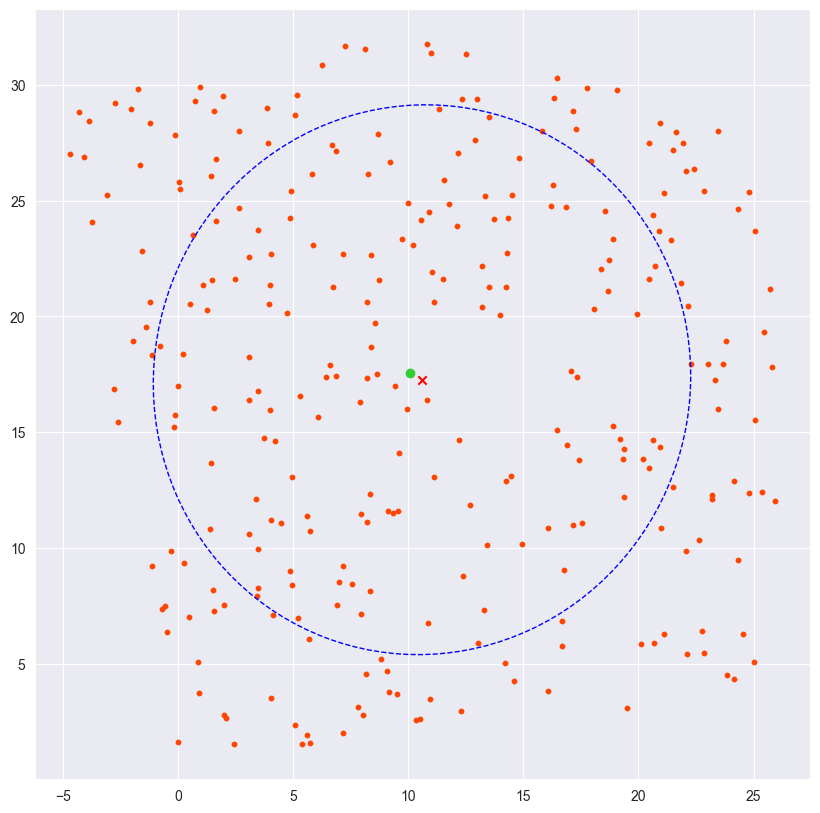

In [116]:
f, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(x=points_K21.X_m, y=points_K21.Y_m, s=10, color='orangered')
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*median_center, color='limegreen', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, width=major * 2, height=minor * 2, angle=np.rad2deg(rotation), facecolor='none', edgecolor='blue', linestyle='--',label='Std. Ellipse')

ax.add_patch(ellipse)

plt.show()

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


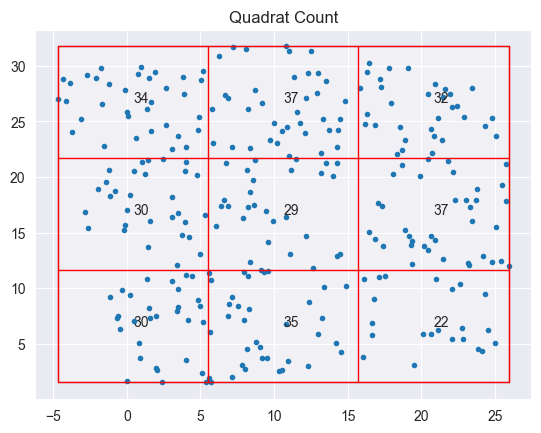

In [117]:
qstat = QStatistic(numpy_array_K21)
qstat.plot()

In [118]:
qstat.chi2_pvalue

0.6863316298992084

In [119]:
k_test = ripley.k_test(points_K21, support=30, keep_simulations=True)

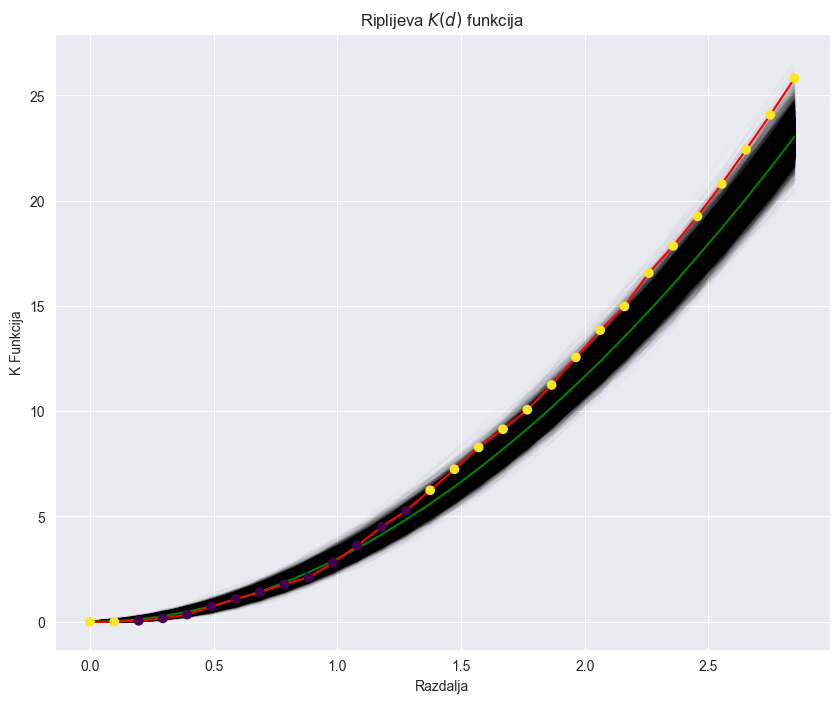

In [120]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(k_test.support, np.median(k_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(k_test.support, k_test.statistic, color='red', label='opazovano')
ax.scatter(k_test.support, k_test.statistic, cmap='viridis', c=k_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('K Funkcija')
ax.set_title('Riplijeva $K(d)$ funkcija')
plt.show()

In [121]:
k_test.pvalue

array([0.    , 0.    , 0.1017, 0.0947, 0.1047, 0.4832, 0.4065, 0.444 ,
       0.3571, 0.1344, 0.367 , 0.3211, 0.1203, 0.1054, 0.0476, 0.0226,
       0.0126, 0.0219, 0.0356, 0.022 , 0.0102, 0.0073, 0.0113, 0.0039,
       0.0044, 0.0048, 0.0036, 0.0025, 0.0021, 0.0013])

In [122]:
CE_K21 = ClarkEvans(numpy_array_K21)

CE_CSR_K21 = ClarkEvans_CSR(dumb_list_K, n_pts=numpy_array_K21.shape[0], realizations=1000)

print('Clark-Evansov indeks za kontrolno ploskev: ' + str(CE_K21))
print('Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: ' + str(CE_CSR_K21))

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages

Clark-Evansov indeks za kontrolno ploskev: 1.0817704348052415
Clark-Evansovi indeksi za 1000 naključno ustvarjenih vzorcev: [[1.04788182]
 [1.1104277 ]
 [1.03489054]
 [1.07230786]
 [0.98992182]
 [1.07500748]
 [1.0777583 ]
 [1.06122488]
 [1.08821878]
 [1.07509136]
 [1.01349121]
 [1.03174394]
 [1.08140043]
 [1.11414955]
 [1.10581836]
 [1.05235877]
 [1.08662308]
 [1.11385068]
 [1.05813914]
 [1.02590155]
 [1.03565477]
 [1.04680529]
 [1.03906282]
 [1.03059909]
 [1.09982377]
 [1.02969137]
 [1.05126694]
 [1.05362737]
 [1.09294251]
 [0.99182716]
 [1.04274869]
 [1.03816075]
 [1.04747508]
 [1.04310921]
 [1.06161608]
 [1.0846059 ]
 [1.02047047]
 [1.03472198]
 [1.07481047]
 [1.03975903]
 [1.05402338]
 [1.06100374]
 [1.03050441]
 [1.04296684]
 [1.09002871]
 [1.11713258]
 [1.07351429]
 [1.08882002]
 [1.06321836]
 [1.02404568]
 [1.01562892]
 [1.07951511]
 [1.1014219 ]
 [1.08142443]
 [1.07483089]
 [1.07863832]
 [1.0910512 ]
 [1.03832736]
 [1.02786408]
 [1.0323282 ]
 [1.04472924]
 [1.05810784]
 [1.0393

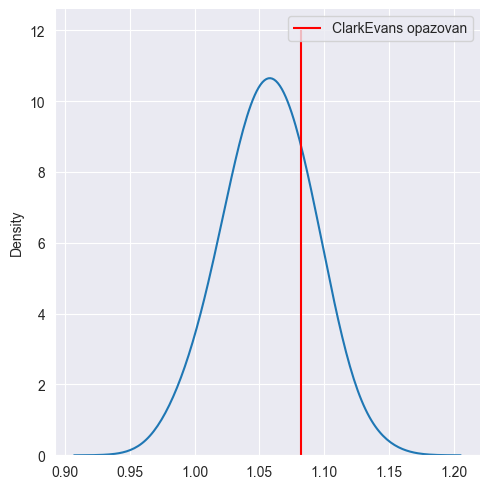

In [123]:
sns.displot(x=CE_CSR_K21[:, 0], kind='kde', bw_adjust=2)
plt.vlines(CE_K21, 12, 0, color='r', label='ClarkEvans opazovan')
plt.legend()

In [124]:
cluster_count_K21 = np.round(points_K21.shape[0] *0.02)

clusterer_K21 = DBSCAN(eps=1, min_samples=int(cluster_count_K21))
clusterer_K21.fit(points_K21[['X_m', 'Y_m']])

DBSCAN(eps=1, min_samples=6)

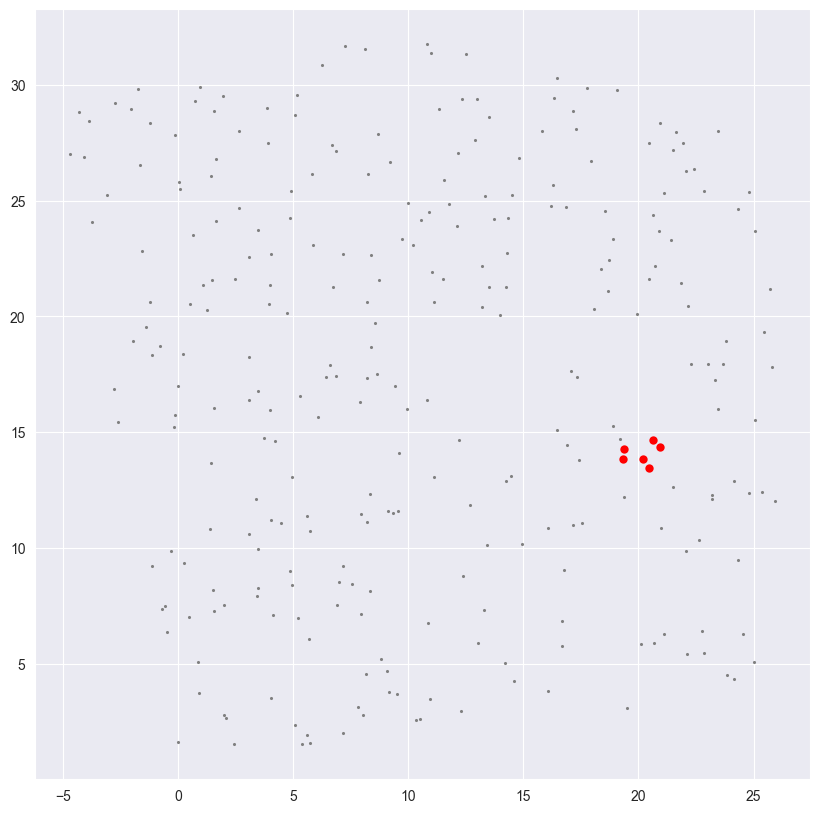

In [125]:
lbls = pd.Series(clusterer_K21.labels_, index=points_K21.index)

f, ax = plt.subplots(1, figsize=(10,10))

noise = points_K21.loc[lbls == -1, ['X_m', 'Y_m']]

ax.scatter(noise.X_m, noise.Y_m, c='grey', s=5, linewidth=0)
ax.scatter(points_K21.loc[points_K21.index.difference(noise.index), 'X_m'], points_K21.loc[points_K21.index.difference(noise.index), 'Y_m'], c='red', linewidth=0)

plt.show()

<h3>Zaključek</h3>
<p>Po analizi je očitno, da redčenja precej močneje zmanjšajo gostoto sestoja in ga s tem, razumljivo, tudi precej bolj spremenijo. Z redčenji se znebimo gruč dreves in s tem razporeditev dreves v sestoju naredimo bolj naključno. To najbolje ponazarja riplikeva K(d) funkcija. Razlika med riplijevo K(d) pred in po redčenju za ploskev 3 je očitna. Krivulja K(d) za podatke lokacij na ploskvi po redčenju se precej bolje ujema z ovojnicami zaupanja kot pa se je tista nastala iz podatkov o lokacijah pred redčenjem. Na grafih za kontrolno metodo pred in po redčenju pa ni opaziti bistvenih razlik. Je pa res, da je razporeditev dreves na kontrolni metodi bila že od začetka precej bolj naključna kot pa tista pri ploskvi 3.</p>

<h3>Izbranci</h3>

In [8]:
numpy_array_09 = ploskev_2_in_3_df[0][['Status_drevesa_09']].dropna().to_numpy()
diff = np.zeros(shape=(numpy_array_09.shape[0], 1))
for i in range(numpy_array_09.shape[0]):
    if numpy_array_09[i] != 1:
        diff[i] = 0
    else:
        diff[i] = 1
diff

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [9]:
numpy_array_izb_09 = np.multiply(numpy_array, diff[:367])
numpy_array_izb_09

array([[ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 5.722,  3.319],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 2.24 ,  2.869],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 3.919,  9.703],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],


In [10]:
diff.sum()

37.0

In [11]:
points_izb_09 = pd.DataFrame(numpy_array_izb_09)
points_izb_09.columns = ['X', 'Y']
points_izb_09 = points_izb_09.replace(0, np.nan)
points_izb_09 = points_izb_09.dropna(how='all', axis=0)
points_izb_09 = points_izb_09.replace(np.nan, 0)
points_izb_09


,X,Y
6,5.722,3.319
11,2.240,2.869
34,3.919,9.703
49,8.974,10.814
59,8.609,3.874
73,17.355,3.230
78,15.639,6.945
83,11.747,10.981
93,15.273,14.049
97,17.227,15.087


In [12]:
np_izb_09 = points_izb_09.to_numpy()

In [13]:
len(points_izb_09)

36

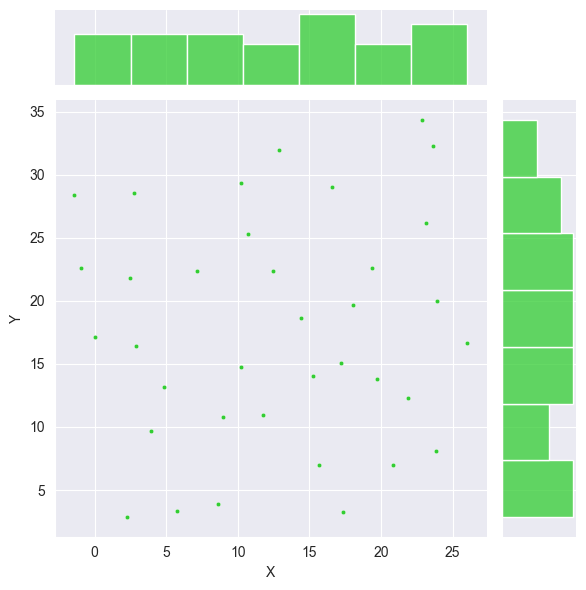

In [22]:
sns.jointplot(x=points_izb_09.X, y=points_izb_09.Y, s=10, color='limegreen')

plt.show()

In [24]:
mean_center = centrography.mean_center(points_izb_09[['X', 'Y']])
median_center = centrography.euclidean_median(points_izb_09[['X', 'Y']])
print('Središče mase za izbrance(9 let): ' + str(mean_center))
print('Medianino središče za izbrance(9 let): ' + str(median_center))

Središče mase za izbrance(9 let): [12.64161111 17.65480556]
Medianino središče za izbrance(9 let): [13.19757381 17.31549258]


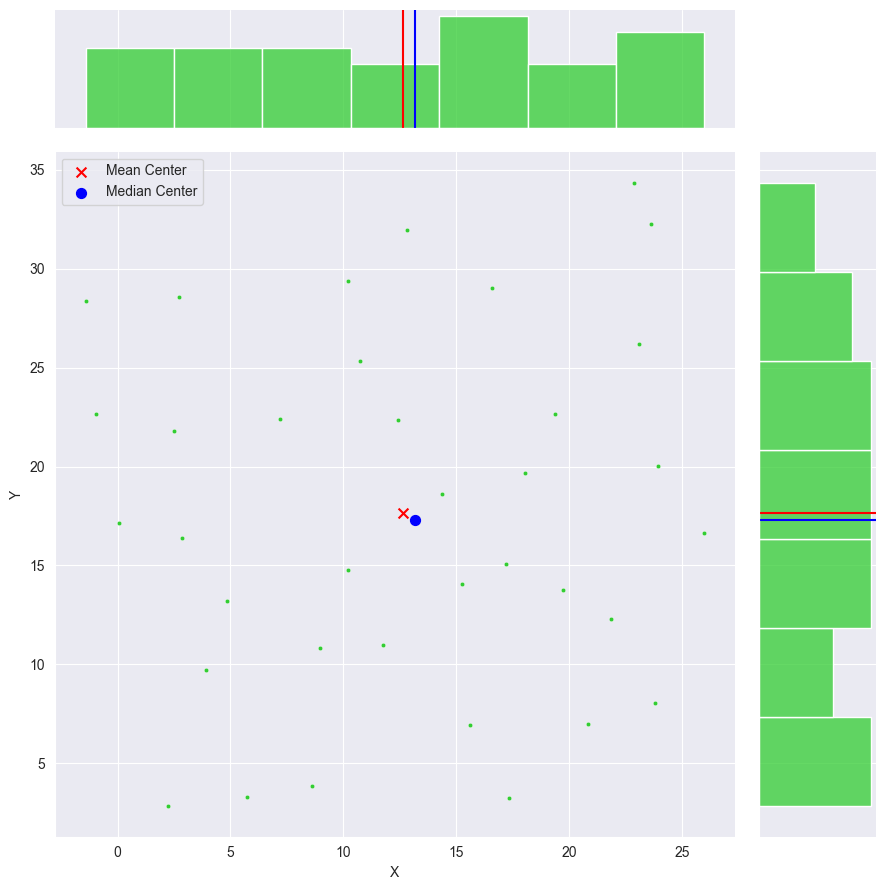

In [25]:
joint_axes = sns.jointplot(x=points_izb_09.X, y=points_izb_09.Y, s=10, height=9, color='limegreen')

joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

joint_axes.ax_joint.scatter(*median_center, color='blue', marker='o', s=50, label='Median Center')

joint_axes.ax_marg_x.axvline(median_center[0], color='blue')
joint_axes.ax_marg_y.axhline(median_center[1], color='blue')

joint_axes.ax_joint.legend()


In [34]:
std_dist = centrography.std_distance(points_izb_09[['X', 'Y']])
print('Standardna razdalja za izbrance (9 let): ' + str(std_dist))

Standardna razdalja za izbrance (9 let): 11.98031596944018


In [28]:
major, minor, rotation = centrography.ellipse(points_izb_09[['X', 'Y']])
print('Dolžina: ' + str(major))
print('Višina: ' + str(minor))
print('Orientacija: ' + str(rotation))

Dolžina: 11.575698092274854
Višina: 12.620145440355593
Orientacija: 0.28818343825498305


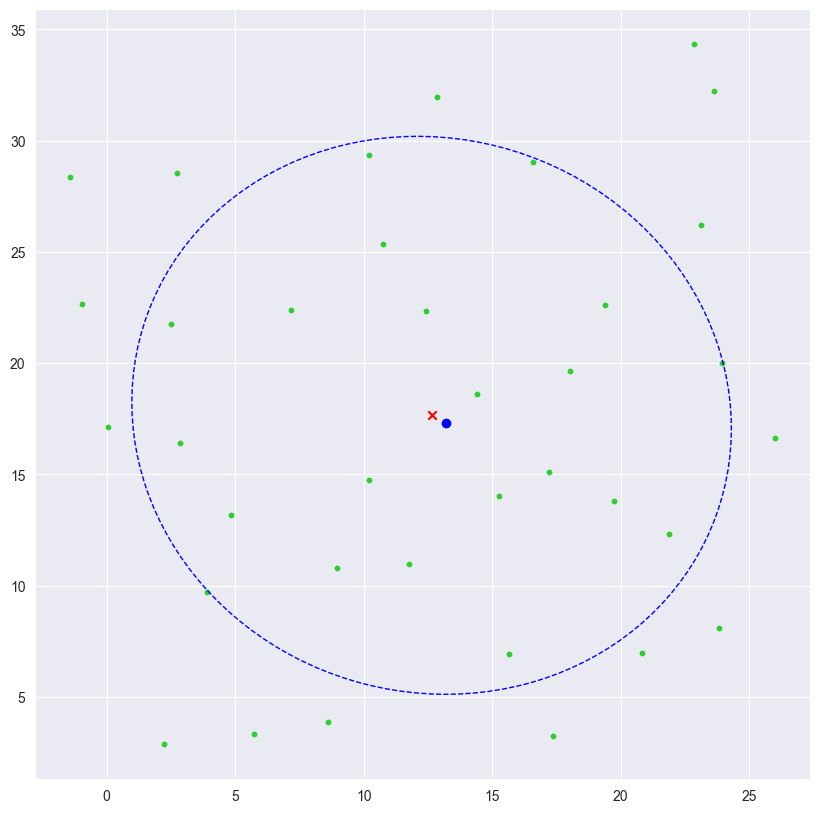

In [29]:
f, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(x=points_izb_09.X, y=points_izb_09.Y, s=10, color='limegreen')
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*median_center, color='blue', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, width=major * 2, height=minor * 2, angle=np.rad2deg(rotation), facecolor='none', edgecolor='blue', linestyle='--',label='Std. Ellipse')

ax.add_patch(ellipse)

plt.show()

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


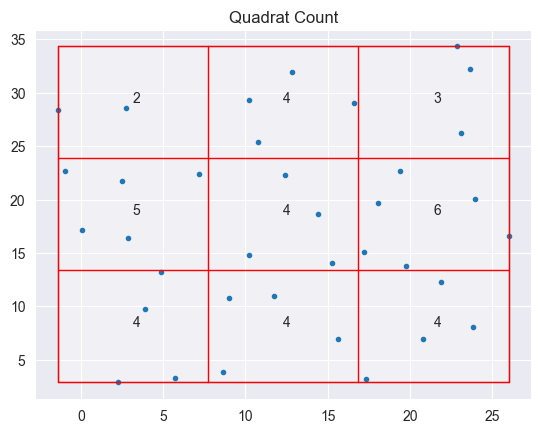

In [166]:
qstat = QStatistic(np_izb_09)
qstat.plot()

In [167]:
qstat.chi2_pvalue

0.9617309457103776

In [14]:
k_test = ripley.k_test(points_izb_09, support=30, keep_simulations=True)

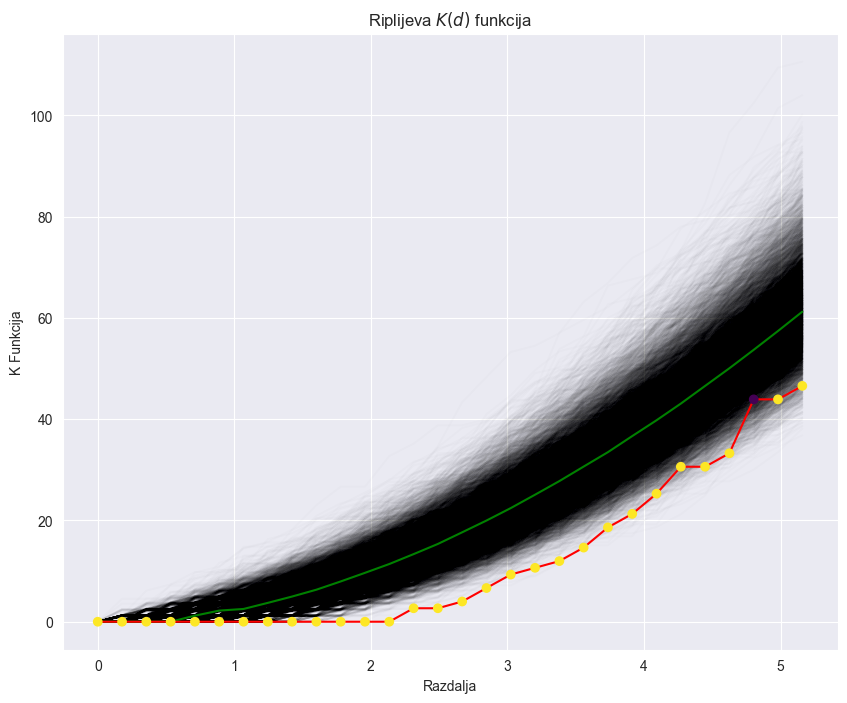

In [169]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(k_test.support, np.median(k_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(k_test.support, k_test.statistic, color='red', label='opazovano')
ax.scatter(k_test.support, k_test.statistic, cmap='viridis', c=k_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('K Funkcija')
ax.set_title('Riplijeva $K(d)$ funkcija')
plt.show()

In [15]:
k_test.pvalue

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 3.00e-04, 1.00e-04, 0.00e+00, 1.00e-04, 4.00e-04,
       4.00e-04, 2.00e-04, 2.00e-04, 1.20e-03, 1.70e-03, 4.20e-03,
       2.00e-02, 4.80e-03, 4.20e-03, 8.18e-02, 2.70e-02, 2.02e-02])

<p>Vidimo lahko, da so ovojnice na splošno nad opazovano funkcijo, kar pomeni, da je naš točkovni vzorec razpršen. To lahko sklepamo, ker so razdalje premajhne, ​​kar nakazuje, da je vzorec manj gručast, kot bi sicer pričakovali. Ko so točke razporejene preveč pravilno, so njihove razdalje manjše, kot če bi bile razporejene naključno.</p>

In [17]:
numpy_array_izb_21 = ploskev_2_in_3_df[0][['Status_21']].dropna().to_numpy()
diff_2 = np.zeros(shape=(numpy_array_izb_21.shape[0], 1))
for i in range(numpy_array_izb_21.shape[0]):
    if numpy_array_izb_21[i] != 1:
        diff_2[i] = 0
    else:
        diff_2[i] = 1
diff_2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [18]:
diff_2.sum()

30.0

In [19]:
np_array_izb_21 = np.multiply(numpy_array, diff[:367])
np_array_izb_21

array([[ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 5.722,  3.319],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.67 ,  4.206],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],


In [20]:
points_izb_21 = pd.DataFrame(np_array_izb_21)
points_izb_21.columns = ['X', 'Y']
points_izb_21 = points_izb_21.replace(0, np.nan)
points_izb_21 = points_izb_21.dropna(how='all', axis=0)
points_izb_21 = points_izb_21.replace(np.nan, 0)
points_izb_21


,X,Y
6,5.722,3.319
17,-0.670,4.206
49,8.974,10.814
59,8.609,3.874
78,15.639,6.945
83,11.747,10.981
97,17.227,15.087
117,26.003,16.630
124,23.487,12.770
135,20.824,6.987


In [21]:
len(points_izb_21)

29

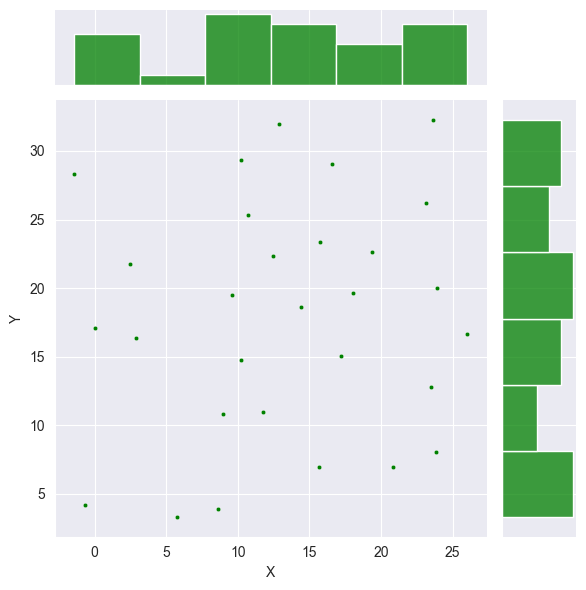

In [30]:
sns.jointplot(x=points_izb_21.X, y=points_izb_21.Y, s=10, color='green')

plt.show()

In [31]:
mean_center = centrography.mean_center(points_izb_21[['X', 'Y']])
median_center = centrography.euclidean_median(points_izb_21[['X', 'Y']])
print('Središče mase za izbrance(21 let): ' + str(mean_center))
print('Medianino središče za izbrance(21 let): ' + str(median_center))

Središče mase za izbrance(21 let): [13.31603448 17.87358621]
Medianino središče za izbrance(21 let): [14.26812851 18.60160926]


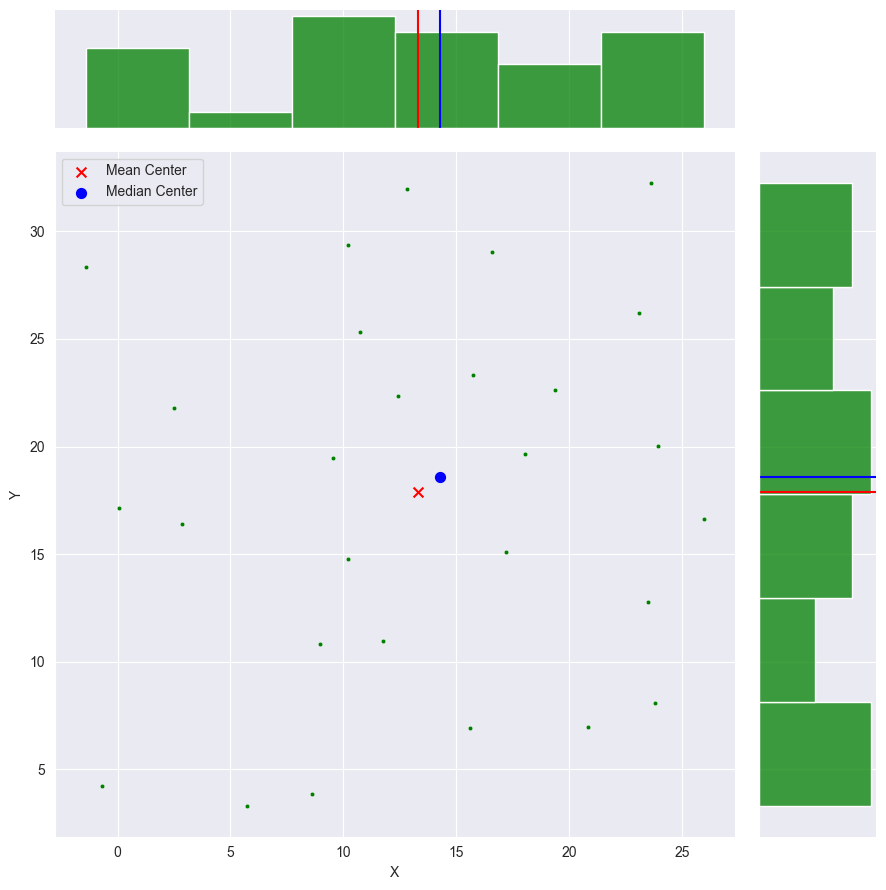

In [33]:
joint_axes = sns.jointplot(x=points_izb_21.X, y=points_izb_21.Y, s=10, height=9, color='green')

joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')

joint_axes.ax_joint.scatter(*median_center, color='blue', marker='o', s=50, label='Median Center')

joint_axes.ax_marg_x.axvline(median_center[0], color='blue')
joint_axes.ax_marg_y.axhline(median_center[1], color='blue')

joint_axes.ax_joint.legend()

In [35]:
std_dist = centrography.std_distance(points_izb_21[['X', 'Y']])
print('Standardna razdalja za izbrance (21 let): ' + str(std_dist))

Standardna razdalja za izbrance (21 let): 11.550309140511317


In [36]:
major, minor, rotation = centrography.ellipse(points_izb_21[['X', 'Y']])
print('Dolžina: ' + str(major))
print('Višina: ' + str(minor))
print('Orientacija: ' + str(rotation))

Dolžina: 11.12322533559165
Višina: 11.565074041365866
Orientacija: 0.5200435115161851


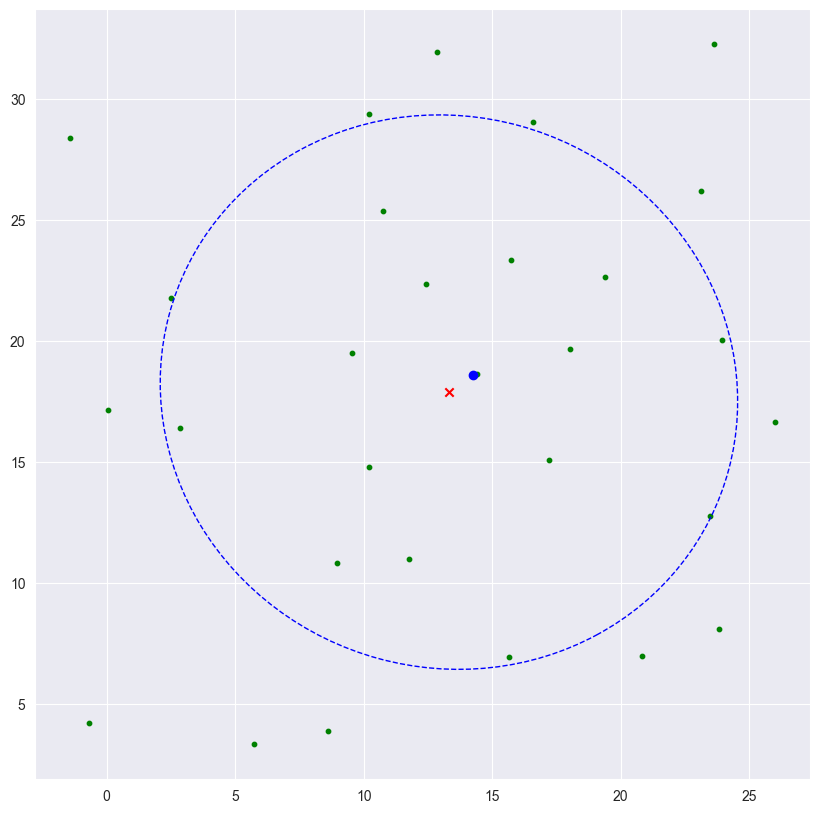

In [37]:
f, ax = plt.subplots(1, figsize=(10,10))

ax.scatter(x=points_izb_21.X, y=points_izb_21.Y, s=10, color='green')
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*median_center, color='blue', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, width=major * 2, height=minor * 2, angle=np.rad2deg(rotation), facecolor='none', edgecolor='blue', linestyle='--',label='Std. Ellipse')

ax.add_patch(ellipse)

plt.show()

In [38]:
np_izb_21 = points_izb_21.to_numpy()

C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\gaber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


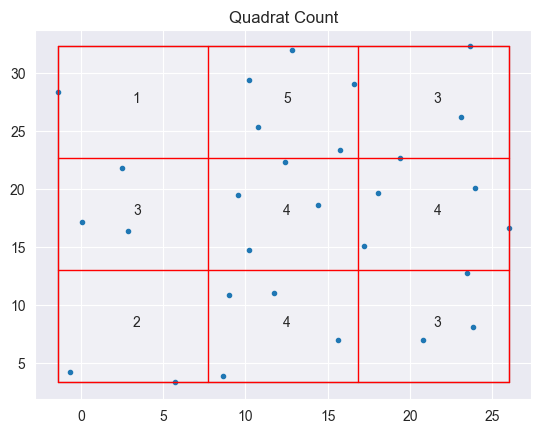

In [40]:
qstat = QStatistic(np_izb_21)
qstat.plot()

In [41]:
qstat.chi2_pvalue

0.8923971263236162

In [43]:
k_test = ripley.k_test(points_izb_21, support=30, keep_simulations=True)

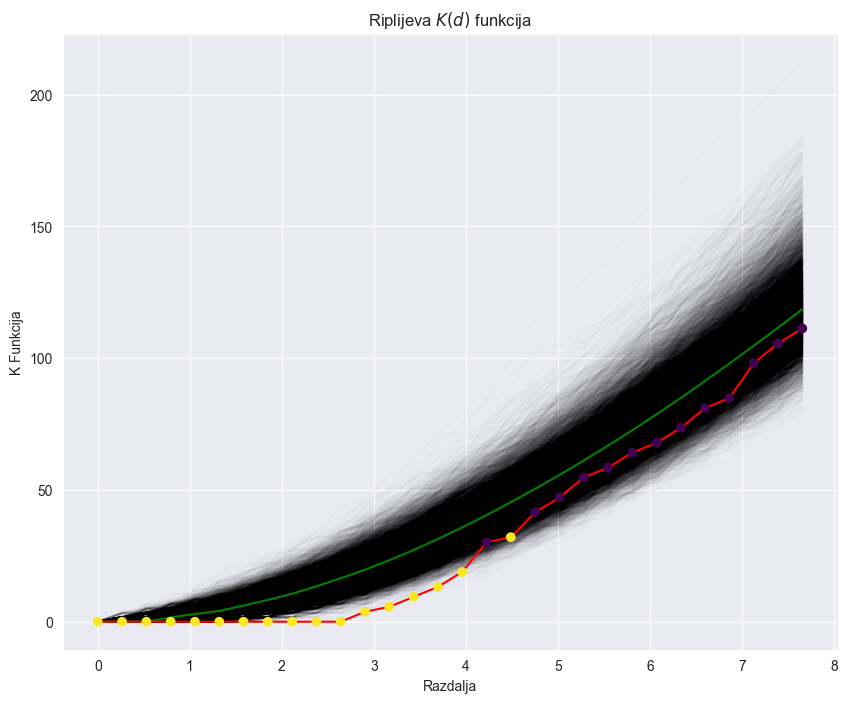

In [44]:
f, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.01, label='simulirano')
ax.plot(k_test.support, np.median(k_test.simulations, axis=0), color='green', label='mediana simulacij')

ax.plot(k_test.support, k_test.statistic, color='red', label='opazovano')
ax.scatter(k_test.support, k_test.statistic, cmap='viridis', c=k_test.pvalue < .05, zorder=4)

ax.set_xlabel('Razdalja')
ax.set_ylabel('K Funkcija')
ax.set_title('Riplijeva $K(d)$ funkcija')
plt.show()

<p>Tokrat krivulja poteka precej bolj znotraj ovojnic, kar pomeni, da je 2. redčenje razporeditev izbrancev naredilo bolj naključno. Za majhne vrednost razdalj je točk premalo (do približno 2,5m radija)</p>